# Carcinoma do endométrio do corpo uterino
Autores: Duarte Velho(pg53841), Joana Lopes(pg53498), Ricardo Oliveira(pg53501)

<p align="justify">
Este trabalho foi desenvolvido no âmbito da UC Extração de Conhecimentos de Dados Biológicos (2023/24), do Mestrado em Bioinformática da Escola de Engenharia da Universidade do Minho, e tem como objetivo a análise de um conjunto de dados de expressão genética relacionados com o Carcinoma Endometrial do Corpo Uterino utilizando python e os seus diversos packages.
</p>

## 1ª parte
<p align="justify">
A primeira fase deste trabalho será constituída pelas seguintes etapas: - explicação dos dados, sua origem e relevância; - tarefas de preparação e de pré-processamento dos dados; - sumarização dos dados (estatística descritiva, exploração com recurso a gráficos); - análise estatística univariada e análise de expressão diferencial e de enriquecimento.
</p>

### Instalação e importação de packages
<p align="justify">
Nesta secção são destacados todos os packages utilizados no trabalho, que facilitam a aquisição e análise de dados ao longo do documento, tornando mais eficiente a obtenção e compreensão das informações relevantes.
</p>

In [3]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from pydeseq2 import *
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import gseapy as gp
from gseapy.plot import gseaplot
from sklearn.manifold import TSNE

### Introdução

#### Enquadramento

<p align="justify">
Nos dias de hoje, o cancro é uma das principais causas de morte a nível mundial, sendo que, segundo a Organização Mundial da Saúde (OMS), em 2020, foram diagnosticados cerca de 19,3 milhões de novos casos de cancro, que resultaram na morte, de aproximadamente 10 milhões de pessoas [1].
O preocupante aumento da incidência do cancro ao longo das últimas décadas, levou ao surgimento de iniciativas, tal como a PanCancer Atlas, que visam encontrar respostas para as grandes e abrangentes questões sobre o cancro, através da análise de tumores caracterizados no conjunto de dados resultantes do projeto de The Cancer Genome Atlas (TCGA).
O TCGA é um programa de genómica de referência na área do cancro que, em colaboração com o Instituto Nacional do Cancro (NCI) e o Instituto Nacional de Pesquisa do Genoma Humano (NHGRI) dos Estados Unidos, caracterizou mais de 20 mil cancros primários abrangendo 33 tipos de cancro.
Os tipos de cancro selecionados para estudo cumprem requisitos tais como ter um mau prognóstico, ter um impacto geral na saúde pública, disponibilidade de amostras com a qualidade e quantidade desejadas, entre outros.
(National Cancer Institute, 2022)

O cancro endometrial do corpo uterino, um dos cancros incluídos no TCGA, é o sétimo tumor maligno mais frequente no mundo e o quarto mais comum na mulher sendo a doença ginecológica maligna dominante, tendo provocado em 2011 mais de 8 mil mortes [2, 3].
De todos os cancros do corpo uterino mais de 83% correspondem a carcinomas do endométrio, enquanto apenas 10% dos diagnósticos são classificados como sarcomas [2].
Este tipo de cancro tem ganho maior atenção por parte da comunidade científica, uma vez que se verificou um aumento da sua incidência com a agravante de que a taxa de sobrevivência aos 5 anos é consideravelmente menor, em comparação com o ano de 1975, passando de 88% para cerca de 84%, em 2006, indicando um aumento na mortalidade [3].
A taxa de sobrevivência está fortemente correlacionada com o estádio da doença aquando do diagnóstico, sendo que para pacientes no estádio inicial se considera curável atingindo cerca de 96% de sobrevivência.
No entanto, para fases mais avançadas e de alto grau, é considerado letal reduzindo drasticamente a taxa de sobrevivência para 17%.
</p>

#### Objetivo

<p align="justify">
Com base na problemática apresentada, este trabalho tem como objetivo analisar o perfil transcriptómico de células endometeriais do corpo uterino de pacientes diagnosticados com cancro para determinadas condições descritas nos metadados, de modo a realizar a análise da expressão diferencial com o intuito de compreender qual o efeito do fator no perfil transcriptómico das células e como esse perfil se traduz na gravidade da doença observada.
Os dados utilizados neste trabalho estão disponíveis no [GDC DataPortal](https://shorturl.at/fmpJ5).
</p>

### Extração dos dados de transcriptómica e respetivos metadados da base de dados

#### Obtenção dos dados

<p align="justify">
Com o objetivo de analisar os dados de transcriptómica referente ao carcinoma endometrial do corpo uterino, procedemos à extração da informação que se encontra presente no website cBioPortal, onde se encontram disponibilizados, de forma gratuita, uma grande diversidade de alterações genómicas de vários tipos de cancro, incluindo o cancro selecionado para estudo.
Como no trabalho anterior já procedemos ao download dos dados de expressão genética e dos seus respetivos metadados, apenas se realizou a leitura dos respetivos dados utilizando o package pandas.
</p>

In [4]:
gene_exp = pd.read_excel(io="../Data/expressao_genetica.xlsx", index_col=0)
genes_meta = pd.read_excel(io="../Data/genes_metadados.xlsx", index_col=0)
amostras_meta = pd.read_excel(io="../Data/amostras_metadados.xlsx", index_col=0)
print("Leitura dos dados concluída")

Leitura dos dados concluída


In [3]:
print(f"Classe dos dados de expressão:{type(gene_exp)}")
print(f"Classe dos dados de expressão:{type(genes_meta)}")
print(f"Classe dos dados de expressão:{type(amostras_meta)}")
print(f"\nO dataframe da expressão genética tem {gene_exp.shape[0]} linhas e {gene_exp.shape[1]} colunas")
print(f"O dataframe dos genes possui {genes_meta.shape[0]} linhas e {genes_meta.shape[1]} colunas")
print(f"O dataframe das amostras tem {amostras_meta.shape[0]} linhas e {amostras_meta.shape[1]} colunas")
print(f"\nNomes das 5 primeiras colunas do dataframe de expressão genética: {gene_exp.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe dos genes: {genes_meta.columns.values[0:5]}")
print(f"Nomes das 5 primeiras colunas do dataframe das amostras: {amostras_meta.columns.values[0:5]}")

Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>
Classe dos dados de expressão:<class 'pandas.core.frame.DataFrame'>

O dataframe da expressão genética tem 60660 linhas e 589 colunas
O dataframe dos genes possui 60660 linhas e 10 colunas
O dataframe das amostras tem 589 linhas e 78 colunas

Nomes das 5 primeiras colunas do dataframe de expressão genética: ['TCGA-FI-A3PX-01A-11R-A22K-07' 'TCGA-BG-A221-01A-21R-A157-07'
 'TCGA-EY-A1GK-01A-11R-A13S-07' 'TCGA-BG-A2AE-01A-11R-A16F-07'
 'TCGA-AX-A1CE-01A-11R-A137-07']
Nomes das 5 primeiras colunas do dataframe dos genes: ['source' 'type' 'score' 'phase' 'gene_id']
Nomes das 5 primeiras colunas do dataframe das amostras: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition']


Através da análise exploratória inicial dos dados verificou-se que os dados de expressão genénitca, dos metadados associados aos genes e dos metadados associados às amostras estão no formato de dataframe. O dataframe da expressão genética é constituído por 60660 linhas que correspondem ao genes para o qual se estudou a sua expressão genética e 589 colunas que representam as amostras análisadas no estudo. Para cada gene existem 10 colunas de metadados associados que fornecem informação adicional sobre os genes, incluindo o gene_id (código Ensembl), tal como a sua fonte, o nome do gene, entre outros atributos, que podem ser acessados e explorados.
Em relação às amostras, existem 78 colunas de metadados que possibilitam a caracterização das 589 amostras utilizadas neste estudo possibilitando a análise do impacto que as diversas características possuem no estádio ou na gravidade da doença com base nos dados da expressão genética de cada amostra.

Por diversas razões, é frequente trabalhar com metadados associadas às amostras que possuem uma elevada quantidade de valores omissos, o que pode levar a uma redução considerável das amsotras utilizadas em estudo caso a variável que se pretende análisar seja uma das que apresenta elevada percentagem de valores omissos. Para evitar tal acontecimento, primeiramente procedeu-se a uma filtragem do datafram "amostras_meta" com o intuito de apenas preservar as variavíes que possuem menos de 10% de valores omissos

In [5]:
# Filtrar as colunas que são objetos
data_types = amostras_meta.dtypes
string_cols = data_types[data_types == 'object'].index
amostras_meta_filtered = amostras_meta[string_cols]


# Identificar colunas com mais de 60 contagens de "not reported" 
rm_not_reported = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("not reported").sum() > 60)
rm_not_reported = rm_not_reported.index[rm_not_reported].tolist()


# Identificar colunas com mais de 60 contagens de "unkown" 
rm_unkown = amostras_meta_filtered.apply(lambda x: x.str.lower().str.count("unknown").sum() > 60)
rm_unkown = rm_unkown.index[rm_unkown].tolist()


# Identificar colunas com mais de 60 valores NA
rm_nas = amostras_meta.isna().sum() > 60
rm_nas = rm_nas.index[rm_nas].tolist()


# Remover colunas identificadas
amostras_meta_reduzido = amostras_meta.drop(columns=rm_not_reported + rm_unkown + rm_nas)


# Obter dimensões do DataFrame reduzido
dimensao = amostras_meta_reduzido.shape
print(f"Dimensões do DataFrame filtrado: {dimensao}")
print(f"\nNomes das colunas do dataframe das amostras filtrado: {amostras_meta.columns.values}")


Dimensões do DataFrame filtrado: (589, 46)

Nomes das colunas do dataframe das amostras filtrado: ['barcode' 'patient' 'sample' 'shortLetterCode' 'definition'
 'sample_submitter_id' 'sample_type_id' 'tumor_descriptor' 'sample_id'
 'sample_type' 'composition' 'days_to_collection' 'state' 'initial_weight'
 'preservation_method' 'pathology_report_uuid' 'submitter_id'
 'oct_embedded' 'specimen_type' 'is_ffpe' 'tissue_type' 'figo_stage'
 'synchronous_malignancy' 'days_to_diagnosis' 'treatments'
 'last_known_disease_status' 'tissue_or_organ_of_origin'
 'days_to_last_follow_up' 'age_at_diagnosis' 'primary_diagnosis'
 'prior_malignancy' 'year_of_diagnosis' 'prior_treatment' 'morphology'
 'classification_of_tumor' 'diagnosis_id' 'icd_10_code'
 'site_of_resection_or_biopsy' 'tumor_grade' 'progression_or_recurrence'
 'alcohol_history' 'exposure_id' 'race' 'gender' 'ethnicity'
 'vital_status' 'age_at_index' 'days_to_birth' 'year_of_birth'
 'demographic_id' 'year_of_death' 'days_to_death' 'bcr_pati

Com esta filtragem o número de colunas passou de 78 para 46 garantindo assim que as características que possam ser utilizadas para as análises posteriores abrangem a maioria das amostras garantindo maior confiabilidade na análise realizada.


### Análise Descritiva e Exploratória

Para o nosso estudo, de entre as colunas de metadados reduzida, selecionou-se 4 variáveis de caraterísticas distintas, nomeadamente as colunas "vital_status", "primary_diagnosis", "age_at_index" e "figo_stage" para se proceder a uma análise descritiva e exploratória das amostras. A variável figo_state representa o estádio do cancro, nomeadamente no que diz respeito à sua extensão.
Esta classificação está dividia em 4 estádios principais (estádio I, estádio II, estádio III e estádio IV), no entanto, cada estádio encontra-se subdividido. Neste estudo, para conseguirmos visualizar os dados de forma mais eficiente, e dado o objetivo deste trabalho, decidiu-se proceder a uma transformação desta variável, agrupando os diferentes sub-estádios nas suas 4 categorias principais.

In [6]:
meta_amostras = amostras_meta_reduzido[["vital_status", "primary_diagnosis", "age_at_index","figo_stage"]]

# substituir os valores de figo state apenas pelas iniciais
meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)
meta_amostras

C:\Users\Asus\AppData\Local\Temp\ipykernel_23696\753344565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_amostras['figo_stage'] = meta_amostras['figo_stage'].replace(r'.*\b(Stage [VI]+).*', r'\1', regex=True)


,vital_status,primary_diagnosis,age_at_index,figo_stage
row.names(amostras_metadados),,,,
TCGA-FI-A3PX-01A-11R-A22K-07,Alive,"Serous cystadenocarcinoma, NOS",57.0,Stage III
TCGA-BG-A221-01A-21R-A157-07,Alive,"Endometrioid adenocarcinoma, NOS",84.0,Stage I
TCGA-EY-A1GK-01A-11R-A13S-07,Alive,"Endometrioid adenocarcinoma, NOS",74.0,Stage I
TCGA-BG-A2AE-01A-11R-A16F-07,Alive,"Serous cystadenocarcinoma, NOS",57.0,Stage I
TCGA-AX-A1CE-01A-11R-A137-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
...,...,...,...,...
TCGA-AJ-A3NF-01A-11R-A22K-07,Alive,"Serous cystadenocarcinoma, NOS",60.0,Stage III
TCGA-BK-A0C9-01A-11R-A00V-07,Alive,"Endometrioid adenocarcinoma, NOS",57.0,Stage I
TCGA-AJ-A5DW-01A-11R-A27V-07,Alive,"Endometrioid adenocarcinoma, NOS",56.0,Stage I


#### Vital status
A coluna "vital_status", corresponde a uma variável nominal que representa a sobrevivência da paciente com cancro no momento do estudo.
Esta variável pode assumir 3 categorias distintas: "Alive", "Dead", "NA".
Neste dataset verificou-se que, no momento de recolha das amostras, dos 589 pacientes, aproximadamente 81% estavam vivos e 16% tinham falecido, por fim cerca de 2% das amostras não possuem informação disponível acerca do estado vital dando por isso sido reportados como "NAs".

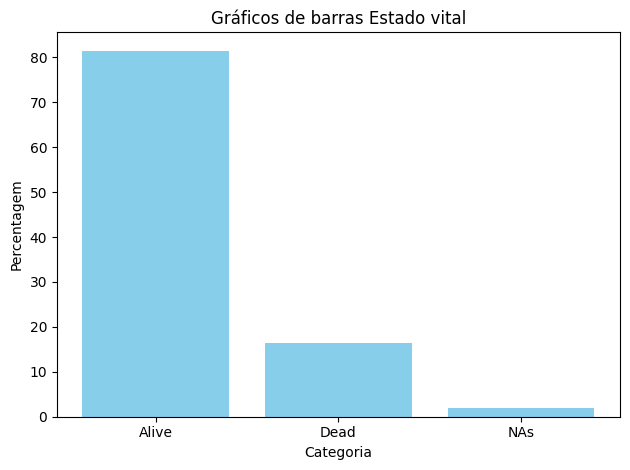

In [6]:
estado_vital = pd.DataFrame(meta_amostras["vital_status"])


# Calculo das percentagens de cada categoria
alive_count = estado_vital [estado_vital["vital_status"] =="Alive"].value_counts().values[0]/589; alive_count= alive_count*100
dead_count = estado_vital [estado_vital["vital_status"] =="Dead"].value_counts().values[0]/589; dead_count = dead_count*100
nas_vital_status = 100 - (alive_count + dead_count)


# Criação da estrutura de dados para o barplot
categories = ["Alive", "Dead", "NAs"]
values = [alive_count, dead_count, nas_vital_status]


# Criação do gráfico de barras
plt.bar(categories,values, color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Percentagem')
plt.title('Gráficos de barras Estado vital')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

#### Primary diagnosis

A coluna "primary_diagnosis", corresponde a uma variável nominal, e descreve o diagnóstico histológico do paciente, de acordo com a Classificação Internacional de Doenças para Oncologia (International Classification of Diseases for Oncology, ICD-O) da Organização Mundial da Saúde.
Apresenta 8 categorias possíveis "Adenocarcinoma, NOS", "Carcinoma, undifferentiated, NOS", "Clear cell adenocarcinoma, NOS", "Endometrioid adenocarcinoma, NOS", "Endometrioid adenocarcinoma, secretory variant", "Papillary serous cystadenocarcinoma", "Serous cystadenocarcinoma, NOS", "Serous surface papillary carcinoma".
A desginação "NOS", Not Otherwise Specified, apenas indica que com base nas informações disponíveis, um determinado tipo de cancro não pode ser encaixado noutra categoria mais específica.
É de notar que apenas foram consideradas as amostras que não possui valores omissos o que levou a uma redução de 589 amostras para 577

Verificou-se que os dados vão de encontro à literatura, sendo o adenocarcinoma do endométrio o tipo de cancro prevalecente neste estudo, com cerca de 73.3% das pacientes diagnosticadas com este tipo de cancro do corpo uterino.
Logo de seguida temos 24.8% das pacientes com cistoadenocarcinomas serosos e 1.9% com outros tipos de cancro que agrupamos na categoria "Outros".

Número total de amostras sem valores omissos: 577


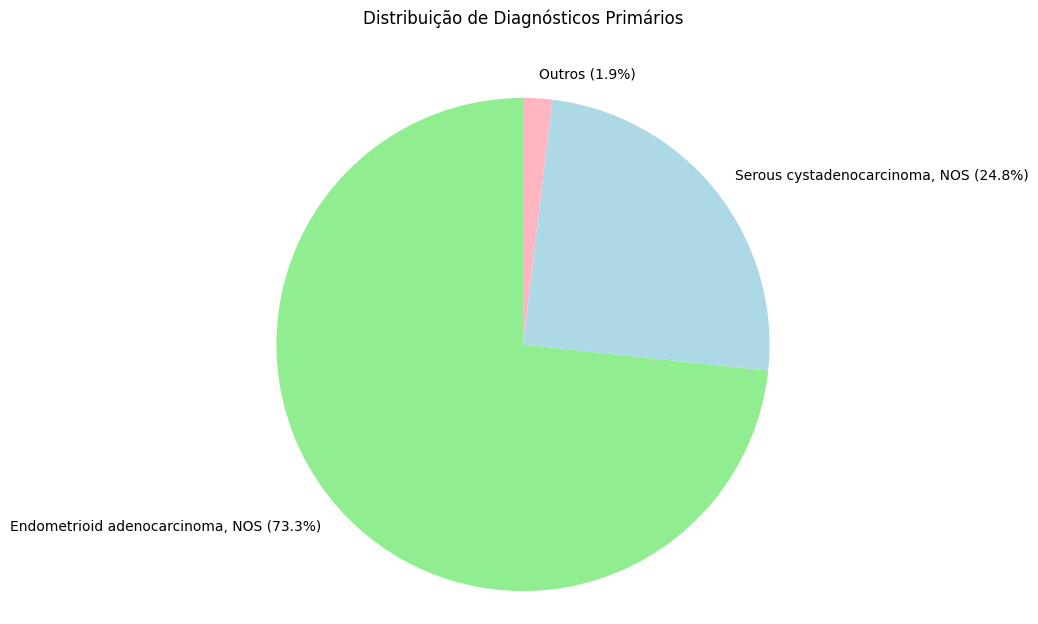

In [7]:
primary_diagnosis = pd.DataFrame(meta_amostras['primary_diagnosis'].value_counts())
print("Número total de amostras sem valores omissos:",sum(primary_diagnosis["count"].values))


# Calculo das percentagens
primary_diagnosis['percent'] = primary_diagnosis['count'] / primary_diagnosis['count'].sum() * 100


# Criação da linha outros
primary_diagnosis_red = pd.DataFrame(primary_diagnosis.iloc[0:2,1])
primary_diagnosis_red.loc["Outros"] = sum(primary_diagnosis.iloc[2:8,1])


# Preparação dos dados para o gráfico circular
labels = primary_diagnosis_red.index.to_list()
percentages = primary_diagnosis_red["percent"].values
formatted_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(labels, percentages)]


# Criação do gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=formatted_labels, startangle=90, colors=['lightgreen', 'lightblue', 'lightpink'])
plt.title("Distribuição de Diagnósticos Primários", y=1.08)
plt.axis('equal')

plt.show()

#### Estádio FIGO

A variável "figo_stage", é ordinal e representa o estádio do cancro, nomeadamente no que diz respeito à sua extensão, especialmente se a doença se espalhou do local original para outras partes do corpo, conforme descrito pelos estádios da Federação Internacional de Ginecologia e Obstetrícia (FIGO) [4].
Esta classificação está dividia em 4 estádios principais, nomeadamente, estádio I onde o tumor está confinado ao corpo uterino, estádio II onde já existe envolvimento do cérvix/colo uterino, estádio III que representa um atingimento de estruturas adjacentes do mesmo órgão, como, por exemplo, os gânglios linfáticos da zona pélvica.
Por último, o estádio IV corresponde ao estado de doença em que já existem metástases noutros órgãos como por exemplo no intestino.
É importante referir que para esta análise apenas foram consideradas as amostras sem valores omissos, significando que das 589 amostras apenas 577 foram utilizadas nesta análise.

Desta forma, esta variável toma 4 níveis "STAGE I", "STAGE II", "STAGE III" e "STAGE IV", sendo que 61.5% das amostras são de tumores em "STAGE I", 9.4% em "STAGE II", 23.7% em "STAGE III", 5.4% em "STAGE IV".
Com isto conclui-se que, mais de metade dos tumores em estudo, são confinados ao corpo uterino, e uma parte considerável correspondem a tumores mais agressivos, com extensão para estruturas adjacentes ao órgão reprodutor feminino (23.7%) ou com atingimento de outros órgãos (5.4%).

Numero de amostras total sem NAs: 577


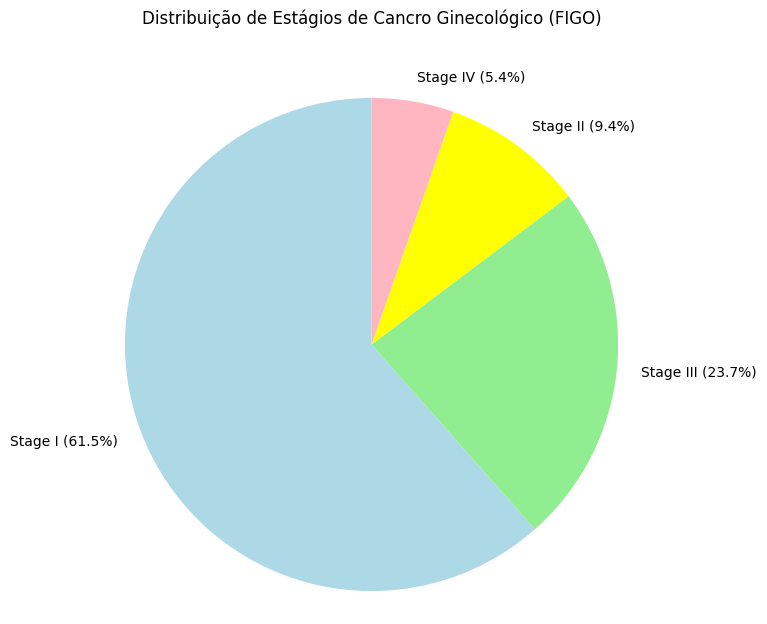

In [8]:
# Isolamento da variável figo_state
figo_state = pd.DataFrame(meta_amostras['figo_stage'].value_counts())
print("Numero de amostras total sem NAs:", sum(figo_state['count'].values))


# Calculo das percentagens
figo_state['percent'] = figo_state['count']/figo_state['count'].sum()* 100


# Preparação dos dados
labels = figo_state.index.to_list()
percentages = figo_state['percent'].to_list()
formatted_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(labels, percentages)]

# Criação do gráfio circular
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=formatted_labels, colors=['lightblue', 'lightgreen', 'yellow', 'lightpink', 'orchid'], startangle=90)
plt.title("Distribuição de Estágios de Cancro Ginecológico (FIGO)", y=1.08)
plt.axis('equal')

plt.show()

#### Idade dos pacientes

A variável "age_at_index", é proporcional contínua, e representa a idade das pacientes em estudo. No entanto, das 589 pacientes apenas foram utilizadas 574 pacientes, uma vez que as restantes  15 pacientes não possuem disponível informação relativamente à sua idade.

Ao realizar-se a análise das estatísticas sumárias verificou-se que a idade média das pacentes é de 63.8 anos sendo que idade mínima registada é de 31 e a máxima de 90 anos. Além disso, através criação de um boxplot, observou-se que a maioria dos pacientes tem idade compreendida entre os 57 e 71 anos, sendo que metade das pacientes em estudo possui 64 ou menos anos. Em adição, é também possível verificar-se a existência de 4 outilers indicando a existência de pacientes consideravelmente mais novos do que a maioria.


A análise do histograma da idade dos pacientes parece indicar uma ligeira inclinação para a direita, no entanto como os valores da mediana e da média são bastante próximos, pode-se concluir que a idade dos pacientes apresenta uma simetria aproximada.

Estatísticas sumárias:
count    574.000000
mean      63.848432
std       11.171815
min       31.000000
25%       57.000000
50%       64.000000
75%       71.000000
max       90.000000
Name: age_at_index, dtype: float64

Número de amostras sem Nas: 574


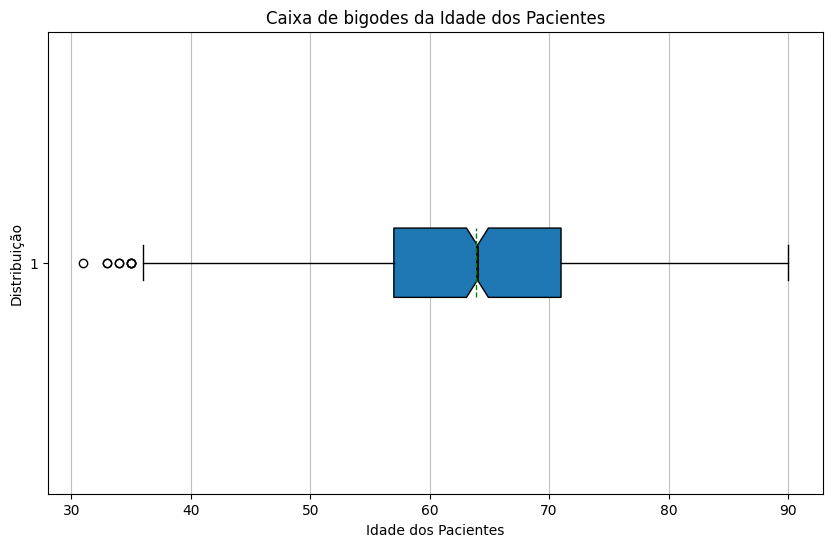

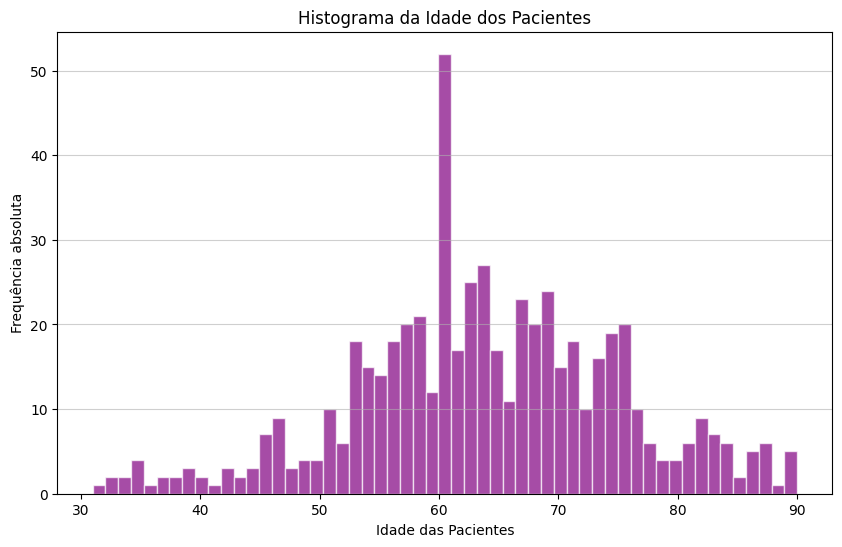

In [9]:
idade_pacientes = meta_amostras['age_at_index']

# Estatísticas descritivas
print("Estatísticas sumárias:\n", idade_pacientes.describe(), sep="")


# Caixa de bigodes
# Remocação dos valores omissos
if idade_pacientes.isnull().sum() > 0:

    idade_pacientes = idade_pacientes.dropna()

print("\nNúmero de amostras sem Nas:",idade_pacientes.shape[0])


# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(idade_pacientes, vert=False, patch_artist=True, notch=True, medianprops={'linewidth': 2, 'color': 'black'},
           showfliers=True, meanline=True, showmeans=True, meanprops={"linewidth":1, "color":"green"})
plt.xlabel('Idade dos Pacientes')
plt.ylabel('Distribuição')
plt.title('Caixa de bigodes da Idade dos Pacientes')
plt.grid(axis='x', linestyle='-', alpha=0.8)  
plt.show()


# Histograma
plt.figure(figsize=(10, 6))  
plt.hist(idade_pacientes, bins=55, edgecolor='white', alpha=0.7, color='purple')
plt.xlabel('Idade das Pacientes')  
plt.ylabel('Frequência absoluta')
plt.title('Histograma da Idade dos Pacientes')
plt.grid(axis='y', linestyle='-', alpha=0.6)

#### Teste de hipótese

**Nota:** para todos os testes de hipotese realizados, considerou-se um valor de prova igual a 0.05.

Através do boxplot "Idade do Paciente por Estádio FIGO" é possível verificar, visualmente, que a mediana das idades em pacientes com tumor no estádio IV é maior que as restantes, o que pode indicar uma relação entre a idade avançada e o estádio do tumor no que diz respeito à sua gravidade.
Entre os restantes estádios não se verifica, visualmente, uma diferença tão notória ao nível da mediana.

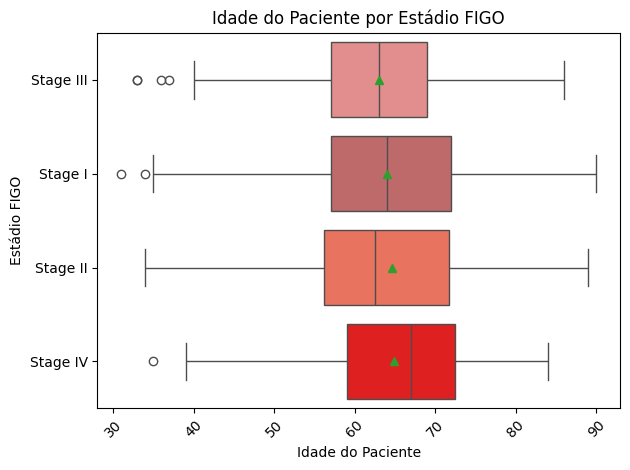

In [10]:
# Remoção das linhas com valores omissos
metados_sem_nas = meta_amostras.dropna()


# Criação do boxplot usando o package Seaborn
sns.boxplot(x="age_at_index", y="figo_stage", showmeans=True,  data=metados_sem_nas,
    palette=["lightcoral", "indianred", "tomato", "red"], orient="h")

plt.xlabel("Idade do Paciente")
plt.ylabel("Estádio FIGO")
plt.title("Idade do Paciente por Estádio FIGO")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Com o intuito de verificar se realmente existem diferenças significativas entre as médias das idades de acordo realizou um teste de anova one-way. No entato, primeiro verificou-se se os dados apresentam uma distribuição normal, uma vez que é necessário a normalidade dos dados para os resultados serem confiáveis

Shapiro-Wilk Teste:
Estatística de teste (W): 0.9915325793954219
p-value: 0.0023057538068824344
Rejeição da hipotese nula. A idade não apresenta uma distribuição normal.


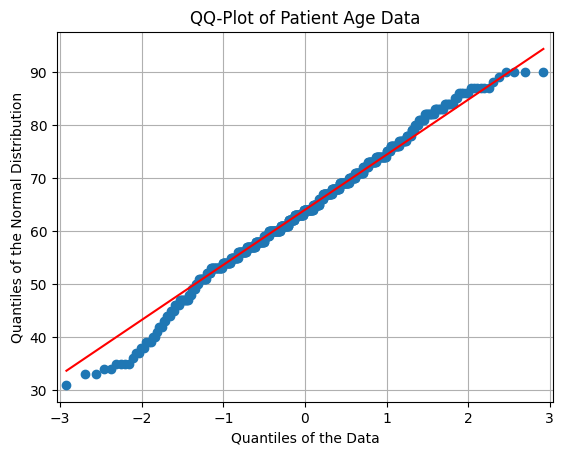


Bartlett Teste:
Estatística de teste (chi-squared): 3.436095238312762
p-value: 0.32914542304057687
Não é possível rejeitar a hipotese nula. As variâncias são homogeneas.


In [11]:
# Extração das idades
age_data = metados_sem_nas['age_at_index']


# Teste à normalidade dos dados (Shapiro-Wilk)
shapiro_test_result = stats.shapiro(age_data)


# Print estatística de teste e p-value
print("Shapiro-Wilk Teste:")
print("Estatística de teste (W):", shapiro_test_result[0])
print("p-value:", shapiro_test_result[1])


# Interpretação dos resultados
if shapiro_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. A idade apresenta distribuição normal.")
else:
    print("Rejeição da hipotese nula. A idade não apresenta uma distribuição normal.")


# QQ-Plot
sm.qqplot(age_data, line='q')
plt.xlabel('Quantiles of the Data')
plt.ylabel('Quantiles of the Normal Distribution')
plt.title('QQ-Plot of Patient Age Data')
plt.grid(True)
plt.show()


# Criação dos grupos de acordo com o FIGO stage
groups = metados_sem_nas.groupby('figo_stage')['age_at_index'].apply(list)


# Bartlett test
bartlett_test_result = stats.bartlett(*groups)


# Print estatística de teste e p-value
print("\nBartlett Teste:")
print("Estatística de teste (chi-squared):", bartlett_test_result[0])
print("p-value:", bartlett_test_result[1])


# Interpretação dos resultados
if bartlett_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. As variâncias são homogeneas.")
else:
    print("Rejeição da hipotese nula. As variâncias não são homogeneas.")
    

Através do **shapiro.test()** verificou-se que os dados da variável "age_at_index" não são normais (p.value\<0.05).
No entanto, através da análise do Q-Q Plot, com sobreposição da linha qqline, verificou-se que os pontos estão, na sua maioria, sobrepostos à linha diagonal e apenas as extremidades se afastam abaixo e acima da diagonal.
Para além disso, estamos perante um grande volume de dados (n=574), ou seja, de acordo com o teorema do limite central, aceita-se a normalidade dos dados apesar de o valor de p-value do teste de shapiro resultar na rejeição da hipótese nula.
Garantindo a normalidade e a homogenidade das variâncias, procedeu-se à análise **anova one way** para verificar se existem ou não diferenças significativas na média das idades dos pacientes entre os diferentes estádios e obteve-se um valor de prova de 0.722, o que não permite rejeitar a hipótese nula, ou seja, não há diferenças significativas na média das idades dos pacientes entre os diferentes estádios.

                     sum_sq     df         F    PR(>F)
C(figo_stage)    166.522794    3.0  0.443443  0.722035
Residual       71349.290794  570.0       NaN       NaN
Não existem diferenças estatisticamente significativas na media das idades entre os vários grupos.


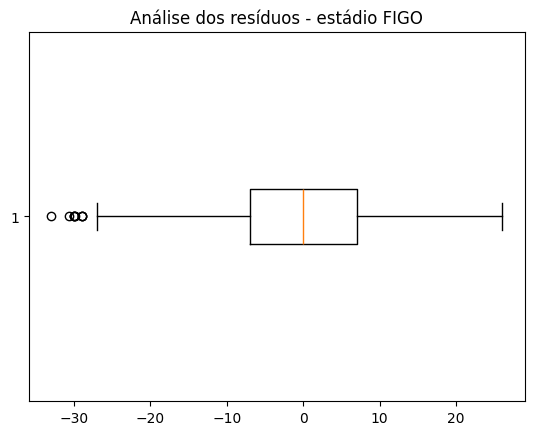

In [12]:
model = ols.ols('age_at_index ~ C(figo_stage)', data=metados_sem_nas).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Print dos resultados da ANOVA
print(aov_table)


# Interpretação dos resultados
if aov_table['PR(>F)'][0] < 0.05 :
    print("Existem diferenças estatisticamente significativas na media das idades entre os vários grupos.")
else:
    print("Não existem diferenças estatisticamente significativas na media das idades entre os vários grupos.")


# Plot dos resíduos
plt.boxplot(model.resid, vert=False)
plt.title("Análise dos resíduos - estádio FIGO")
plt.show()

Procedeu-se à realização do teste não paramétrico **kruskal.test()** para concluir se os resultados seriam os mesmos e, mais uma vez, obtivemos um valor de prova de 0.6632 que não permite rejeitar a hipótese de que não há diferenças significativas na média das idades dos pacientes entre os diferentes estádios.

In [13]:
# Criação dos vários grupos
groups = metados_sem_nas.groupby('figo_stage')['age_at_index'].apply(list)


# Kruskal test
kruskal_test_result = stats.kruskal(*groups)


# Print dos resultados
print("\nKruskal teste:")
print("Estatística de teste (chi-squared):", kruskal_test_result[0])
print("p-value:", kruskal_test_result[1])


# Interpretação dos resultados
if kruskal_test_result[1] > 0.05:
    print("Não é possível rejeitar a hipotese nula. As médias das idades dos pacientes não apresenta diferenças estatisticamente significativas.")
else:
    print("Rejeição da hipotese nula. As médias das idades dos pacientes nos diferentes estádios é estastisticamente diferente.")



Kruskal teste:
Estatística de teste (chi-squared): 1.5833877308389992
p-value: 0.6631623788102903
Não é possível rejeitar a hipotese nula. As médias das idades dos pacientes não apresenta diferenças estatisticamente significativas.


No que diz respeito ao estado de sobrevivência dos pacientes, vital_status, visualmente é transmitida a ideia de que os pacientes que já faleceram tinham uma idade mais avançada.
Através do teste anova one way, para as hipóteses definidas verificou-se que a hipótese nula é rejeitada (p value= 6.13e-05), ou seja, existem diferenças estatisticamente significativas entre a idade dos pacientes nos diferentes grupos "Alive" e "Dead".

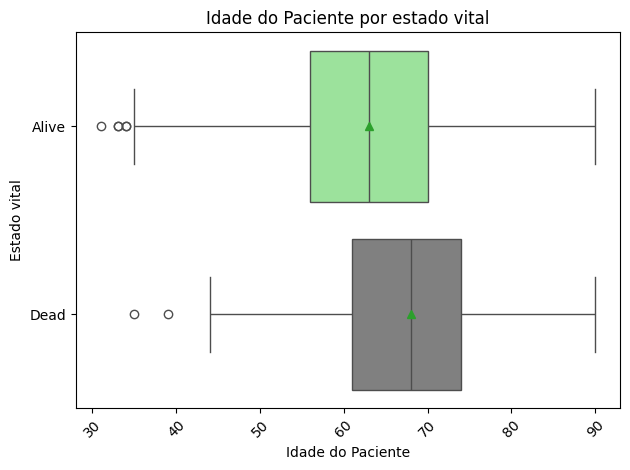

Estatística de teste: -4.0378220054249505
P-value: 6.130334017448354e-05
Existe diferença estatisticamente significativa entre a média das idades do grupo Alive e Dead.


In [14]:
# Criação do box plot das idades em função do estado vital
sns.boxplot( x="age_at_index", y="vital_status", showmeans=True,
    data=metados_sem_nas, palette=["lightgreen", "gray"])


plt.xlabel("Idade do Paciente")
plt.ylabel("Estado vital")
plt.title("Idade do Paciente por estado vital")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Criação dos diferentes grupos
alive = metados_sem_nas[metados_sem_nas['vital_status'] == 'Alive']['age_at_index']
dead = metados_sem_nas[metados_sem_nas['vital_status'] == 'Dead']['age_at_index']


# t teste
t_stat, p_value = stats.ttest_ind(alive, dead)


print(f"Estatística de teste: {t_stat}")
print(f"P-value: {p_value}")


# Interpretação dos resultados
if p_value < 0.05:
    print("Existe diferença estatisticamente significativa entre a média das idades do grupo Alive e Dead.")
else:
    print("Não existe diferenças significativas entre a média das idades do grupo Alive e Dead.")

Realizou-se também para este caso o teste não paramétrico kruskal.test() e obtivemos um valor de prova de 0.0001071 que leva à rejeição da hipótese de que não há diferenças significativas na média das idades dos pacientes entre os diferentes estados de vida ("Alive" e "Dead").

In [15]:
# Criação dos grupos 
groups = metados_sem_nas.groupby('vital_status')['age_at_index'].apply(list)


# Kruskal teste
kruskal_test_result = stats.kruskal(*groups)

# Print dos resultados
print("Kruskal teste:")
print("Estatística de teste (chi-squared):", kruskal_test_result[0])
print("p-value:", kruskal_test_result[1])


# Interpretação dos resultados
if kruskal_test_result[1] < 0.05:
     print("Existe diferenças estatisticamente significativas entre as as médias das idades do grupo Alive e Dead.")
else:
    print("Não existe uma diferença estatisticamente significativa entre as as médias das idades do grupo Alive e Dead.")

Kruskal teste:
Estatística de teste (chi-squared): 15.0078745671541
p-value: 0.00010706349345038721
Existe diferenças estatisticamente significativas entre as as médias das idades do grupo Alive e Dead.


### Análise de expressão diferencial 

A biblioteca **PyDESeq2** é uma ferramenta Python que atua como uma interface para o DESeq2, uma biblioteca em R amplamente utilizada para análise de expressão diferencial em dados de RNA-Seq. Em primeiro lugar, foi necessário selecionar os dados, nomeadamente, seleção dos dados de expressão **"gene_exp"** correspondentes à coluna de metadados de interesse, neste caso **"figo_stage"**.

Embora se tenha realizado uma filtragem ao nível das amostras, uma vez que o dataset possui cerca de 61 mil genes analisados, é importante realizar uma filtragem de modo a remover genes que apresentam expressão ausente, isto é, genes que não possuem nenhuma amostra com expressão e, além disso, é também interessante remover genes que possuem um baixo nível de expressão, uma vez que estes genes não permitem retirar informações relevantes acerca da expressão diferencial.
Para isso eliminou-se do dataset todos aqueles genes que não possuíam pelo menos 20 counts em pelo menos 4 amostras, sendo que estes parâmetros são considerados standard. (https://shorturl.at/nyLT0).

O objetivo desta análise de expressão diferencial será verificar quais genes se encontram a ser diferencialmente expressos em cada uma das condições selecionadas: **"Stage I"** e **"Stage IV"**, que representam o estadio I e o estadio IV do adenocarcinoma do endométrio.

O objeto **dds** é usado para representar os dados de expressão e os metadados associados num formato adequado para análise de expressão diferencial, sendo que, deve receber uma matriz de contagens onde os genes estão nas linhas e as amostras nas colunas. Por isso, foi necessário proceder à matriz transposta através do comando **dados_EA.T**.

Por último, o método **.deseq2()** é chamado no objeto dds para executar a análise de expressão diferencial.

In [168]:
# Remoção das amostras que possui valores omissos para primary_diagnosis
amostras_filtradas = meta_amostras.dropna(subset=['primary_diagnosis'])


# Seleção das amostras com primary_diagnosis igual a "Endometrioid adenocarcinoma, NOS"
amostras_filtradas = amostras_filtradas[amostras_filtradas['primary_diagnosis'] == "Endometrioid adenocarcinoma, NOS"]


# Contar o número de valores NaN na coluna 'figo_stage' de amostras_filtradas
num_na_vital_status = amostras_filtradas['figo_stage'].isna().sum()
print("Número de amostras com valores omissos na variável figo_stage:",num_na_vital_status)


# Selecionar dados de expressão gênica correspondentes às amostras filtradas
dados_EA = gene_exp.loc[:, amostras_filtradas.index]


# Dimensão dos dados_EA
print("Dimensão do dataframe de expressão genética com as amostras filtradas:",dados_EA.shape)


# Remoção dos genes com menos de 20 contagens em pelo menos 4 amostras, standard
genes_manter = dados_EA[dados_EA >= 20].sum(axis=1) >= 4
dados_EA = dados_EA[genes_manter] 
print("Dimensão do dataframe filtrado (genes e amostras):",dados_EA.shape) 


# Transposta da matriz de contagens
dados_EA_t = dados_EA.T


# Criação do objeto deseq
dds = DeseqDataSet(counts=dados_EA_t, metadata=amostras_filtradas, design_factors="figo_stage")
# dds.X  para ver a matriz de contagens
# dds.var para ver os genes ids


# Correr Deseq2
dds.deseq2()

Número de amostras com valores omissos na variável figo_stage: 0
Dimensão do dataframe de expressão genética com as amostras filtradas: (60660, 423)
Dimensão do dataframe filtrado (genes e amostras): (35982, 423)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23696\1504563236.py:33: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(counts=dados_EA_t, metadata=amostras_filtradas, design_factors="figo_stage")
Fitting size factors...
... done in 0.88 seconds.

Fitting dispersions...
... done in 31.60 seconds.

Fitting dispersion trend curve...
... done in 1.31 seconds.

Fitting MAP dispersions...
... done in 25.51 seconds.

Fitting LFCs...
... done in 25.24 seconds.

Replacing 6667 outlier genes.

Fitting dispersions...
... done in 4.19 seconds.

Fitting MAP dispersions...
... done in 4.41 seconds.

Fitting LFCs...
... done in 5.33 seconds.



Ao executar a análise diferencial, o primeiro warning indica que os nomes dos fatores de design contêm underscores ('_'), que serão convertidos em hifens ('-'), ou seja, o metadado "figo_stage" passará a ser acedido como "figo-stage".

Depois disso, o método inicia estimativas de dispersão dos dados. A dispersão é uma medida da variabilidade na expressão gênica entre as amostras e é fundamental para a modelagem estatística precisa. Após a estimativa da dispersão, o método ajusta um modelo estatístico aos dados. Esse modelo leva em consideração os fatores de design especificados durante a criação do objeto dds, neste caso o "figo-stage". Um aspeto interessante levado em conta por este método é a identificação e substituição de outliers, sendo bastante importante, uma vez que neste caso em particular os outliers podem distorcer os resultados e levar a conclusões erradas.

Por último, os log fold changes (LFCs), que representam as diferenças na expressão gênica entre as condições experimentais, são ajustados aos dados.

A função **DeseqStats** é usada para calcular estatísticas específicas e realizar comparações entre diferentes grupos de amostras no contexto da análise de expressão diferencial. Neste caso, queremos extrair as estatísticas relacionadas com o nosso objeto de expressão diferencial, dds, realizando um comparativo entre a condição de Stage IV e de Stage I. Esta função inclui a realização de testes de Wald. Na análise de expressão diferencial, o teste Wald é frequentemente usado para testar se os LFCs são estatisticamente significativos para cada gene.

In [169]:
# Retirar as estatísticas da análise diferencial
stat_res = DeseqStats(dds,contrast=["figo-stage","Stage IV","Stage I",])
stat_res.summary()


# Atribuição dos resultados à variável res
res =stat_res.results_df


Running Wald tests...
... done in 16.41 seconds.



Log2 fold change & Wald test p-value: figo-stage Stage IV vs Stage I
                          baseMean  log2FoldChange     lfcSE      stat  \
row.names(geneExp_df)                                                    
ENSG00000000003.15     2514.763645       -0.122307  0.181285 -0.674664   
ENSG00000000005.6         3.148786       -0.221056  0.685811 -0.322328   
ENSG00000000419.13      690.182327        0.278573  0.176900  1.574750   
ENSG00000000457.14      422.132337       -0.611937  0.186702 -3.277608   
ENSG00000000460.17      204.499079       -0.322030  0.227085 -1.418103   
...                            ...             ...       ...       ...   
ENSG00000288658.1        20.880969        0.616013  0.410265  1.501501   
ENSG00000288660.1         1.094814        0.928499  0.794148  1.169177   
ENSG00000288663.1        19.182492       -0.029071  0.270874 -0.107323   
ENSG00000288670.1       114.543897       -0.101566  0.191775 -0.529610   
ENSG00000288675.1        33.418770        0

In [170]:
print("Dimensões do dataframe dos genes diferencialmente expressos (genes,colunas)",res.shape)

Dimensões do dataframe dos genes diferencialmente expressos (genes,colunas) (35982, 6)


Uma vez que vamos necessitar dos "gene_name" mais à frente, na etapa de análise de enriquecimento, foi adicionado ao nosso dataframe "res", que incorpora informação relativa à expressão diferencial de todos os genes, uma coluna chamada "gene_name" e que vamos buscar ao dataset "genes_meta" carregado no início deste trabalho.

Uma vez que não é relevante analisar genes com médias de expressão baixas, por serem pouco informativos e, consequentemente, provavelmente biologicamente pouco interessantes, procedemos à filtragem do dataframe "res", criando um novo DataFrame chamado "res_filt" que conterá apenas genes com expressão média maior ou igual a 10. Este treshold foi definido com base em documentação disponível em https://shorturl.at/jZv77.

Por último, e com base na mesma documentação, selecionamos os genes diferencialmente expressos através dos valores de padj e log2FoldChange. As condições definidas garantem que apenas os genes que são considerados estatisticamente significativos (com um valor ajustado de p abaixo de 0.05) e que mostram uma mudança biologicamente relevante na expressão (com um LFC maior que 0.5 ou menor que -0.5) sejam incluídos no DataFrame "diferencialmente_expressos".

In [171]:
# Extração do nome de cada gene
nome_gene = []
for gene in res.index:
    nome_gene.append(genes_meta.loc[gene, "gene_name"])
    
# Adição do nome de cada gene ao DataFrame dos resultados da expressão diferencial
res["gene_name"] = nome_gene

# Salvar o DataFrame resultados com o nome de cada gene
res.to_csv("dge_pydeseq2.csv", index=True)

# Remoção de genes com baixa expressão
res_filt = res[res["baseMean"] >= 10]
print("Dimensões do dataframe com a remoção dos genes pouco expressos",res.shape)


# Seleção dos genes diferencialmente expressos com variação de logfoldchange maior a 0.5
diferencialmente_expressos = res_filt[(res_filt.padj < 0.05) & (abs(res_filt.log2FoldChange)>0.5)]
print("Genes diferencialmente expressos entre o Stage IV e Stage I:",diferencialmente_expressos.shape[0])


# Guardar os resultados da análise de expressão diferencial
diferencialmente_expressos.to_excel("../Data/diferencialmente_expressos.xlsx")

Dimensões do dataframe com a remoção dos genes pouco expressos (35982, 7)
Genes diferencialmente expressos entre o Stage IV e Stage I: 1162


Os resultados armazenados no DataFrame "diferencialmente_expressos" foram ordenados por **ordem descrescente de "log2FoldChange"** e através da criação do gráfico de dispressão conseguimos ter uma visão dos genes que mostram as maiores mudanças na expressão entre "Stage IV" e "Stage I". 

Assim sendo, os genes representados por pontos acima de zero no eixo Y (positivos no log2FoldChange) mostram uma expressão génica maior em "Stage IV" do que em "Stage I". Quanto mais acima do eixo zero, maior é a diferença na expressão entre as duas condições. Por outro lado, os genes representados por pontos abaixo de zero no eixo Y (negativos no log2FoldChange) mostram uma expressão génica menor em "Stage IV" do que em "Stage I". Quanto mais abaixo do eixo zero, maior é a diferença na expressão entre as duas condições.

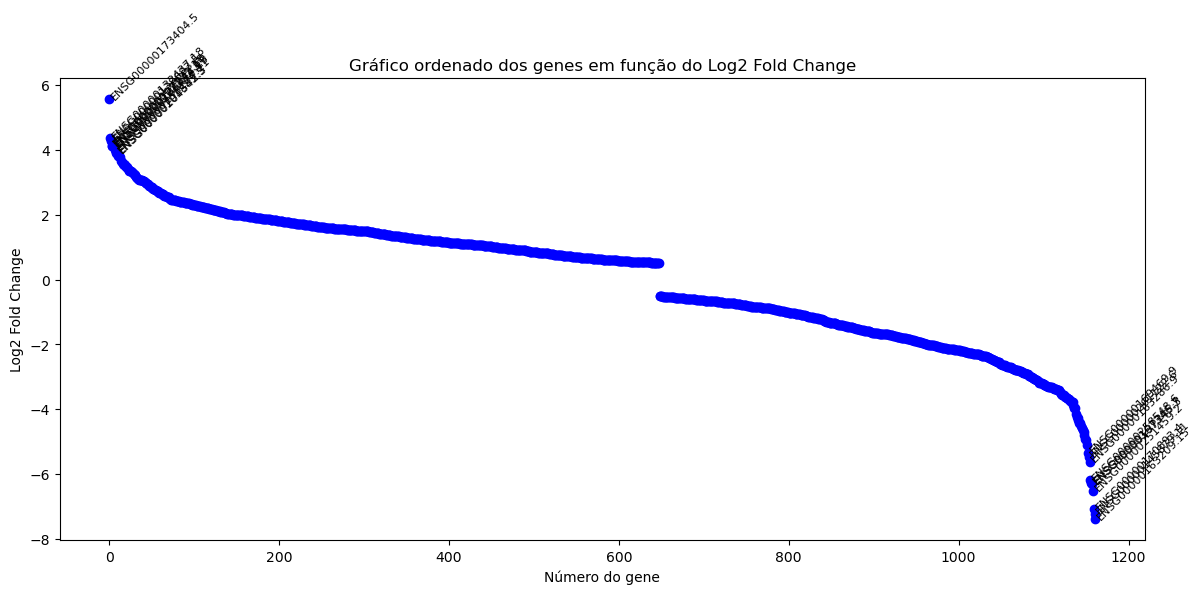

In [172]:
#Ordenar os resultados pelos valores de LFCs
res_ord = diferencialmente_expressos.sort_values(by='log2FoldChange', ascending=False)

# Preparar os dados para o plot
ranked_genes = res_ord['log2FoldChange'].values
gene_names = res_ord.index.to_list()


# Criação do plot
plt.figure(figsize=(14, 6))
plt.plot(ranked_genes, 'bo')
plt.xlabel('Número do gene')
plt.ylabel('Log2 Fold Change')
plt.title('Gráfico ordenado dos genes em função do Log2 Fold Change')

for i, gene in enumerate(gene_names[:10]):
    plt.text(i, ranked_genes[i], gene, fontsize=8, rotation=45)
for i, gene in enumerate(gene_names[-10:]):
    plt.text(len(ranked_genes) - 10 + i, ranked_genes[-10 + i], gene, fontsize=8, rotation=45)

plt.show()

In [173]:
print("Os 10 genes mais diferencialmente expressos para Stage IV:")
print(res_ord.head(10))


print("Os 10 genes menos diferencialmente expressos para Stage IV:")
print(res_ord.tail(10))

Os 10 genes mais diferencialmente expressos para Stage IV:
                         baseMean  log2FoldChange     lfcSE      stat  \
row.names(geneExp_df)                                                   
ENSG00000173404.5       31.712347        5.562794  0.817012  6.808708   
ENSG00000132437.18      31.224183        4.358013  0.788454  5.527287   
ENSG00000138083.5       56.194039        4.281009  0.757206  5.653692   
ENSG00000007171.18      33.262344        4.121946  0.518490  7.949905   
ENSG00000127743.6       18.609925        4.119381  0.459098  8.972766   
ENSG00000136944.19      19.084194        4.118217  0.783552  5.255832   
ENSG00000186474.15     118.670818        4.112855  0.707497  5.813250   
ENSG00000158104.11      26.675424        4.002130  0.444171  9.010327   
ENSG00000101883.5       12.202575        3.913826  0.498432  7.852270   
ENSG00000204542.3      170.302287        3.905152  0.900784  4.335282   

                             pvalue          padj gene_name  
ro

Através da análise dos gráficos, podemos ver que o gene **ENSG00000173404.5** é o que se encontra mais expresso para a condição de estadio IV do tumor (tendo como comparativo o estadio I), apresentando o **valor de log2FoldChange mais alto**, com um **alto nível de significância estatística (padj = 2.052763e-08)**. Este gene pode ser acedido no NCBI gene através do seu identificador, onde é descrito como um gene, **INSM1 (Insulinoma-associated 1)**, que codifica uma proteína que atua como um fator de transcrição, o que significa que está envolvida no controlo da expressão gênica, regulando genes que são ativados ou desativados numa célula (INSM1 INSM Transcriptional Repressor 1 [Homo Sapiens (Human)] - Gene - NCBI, n.d.).
Este gene é expresso em vários tecidos durante o desenvolvimento, incluindo o sistema nervoso, pulmões e glândulas endócrinas. Para além disso, no contexto do cancro, é apontado em vários estudos como um marcador de diagnóstico e prognóstico em alguns tipos de tumores neuroendócrinos. No que diz respeito aos tumores do sistema reprodutor feminino, o INSM1 tem sido apontado como um possível marcador diagnóstico para os tumores neuroendócrinos do colo do útero (Shiho Kuji et al., 2023). O cancro neuroendócrino do colo do útero é um tipo de cancro raro, com alta malignidade e péssimo prognóstico (Shiho Kuji et al., 2017). Como já foi explicado na análise descritiva deste estudo, o estádio IV na classificação FIGO, no que diz respeito aos cancros do endométrio do corpo uterino, é o estádio mais grave da doença estando relacionado com metastização para tecidos adjacentes ao endométrio (revestimento interno do útero). Ou seja, quando estamos perante um cancro do endométrio estádio IV, podemos ter casos em que as pequenas células do colo do útero foram invadidas e possam desenvolver uma forma de tumor neuroendócrino. Ao fazermos esta análise de expressão diferencial, onde estamos a comparar que genes se encontram diferencialmente mais ou menos expressos na condição de tumor estádio IV em comparação com estádio I, verificarmos que este gene é o que se encontra mais diferencialmente expresso para esta condição, pode de facto fazer sentido no contexto do que nos diz a literatura acerca deste tema. 


Por outro lado, através do comando res_ord.tail(10), conseguimos ter acesso aos 10 genes menos expressos para a condição de tumor no estádio IV em comparação com o estádio I. O gene apresentado como menos expresso é o gene **ENSG00000163209.15**, apresentando o **valor de log2FoldChange mais baixo (-7.394250)**, com um **alto nível de significância estatística (padj = 9.747198e-07)**. Este gene pode ser acedido no NCBI gene através do seu identificador, onde é descrito como um gene, **SPRR3 (small proline rich protein 3)**, que codifica uma proteína que pertence à família das proteínas ricas em prolina pequena (SPRR). Essas proteínas são conhecidas pela sua abundância em resíduos de prolina e cisteína e são encontradas predominantemente em tecidos epiteliais, onde desempenham papéis importantes na função da barreira epitelial e na proteção contra stresses ambientais (SPRR3 small proline rich protein 3 [Homo sapiens (human)] - Gene - NCBI. (n.d.).
A diminuição ou o aumento da expressão deste gene tem vindo a ser associada a inúmeros tipos de cancro (Expression of SPRR3 in Cancer - Summary - the Human Protein Atlas, n.d.). Por exemplo, num estudo sobre o carcinoma oral de células escamosas revelou que a expressão reduzida do SPRR3 estava associada a um pior prognóstico para os pacientes, e ainda que a expressão do SPRR3 diminuiu conforme a malignidade do tumor aumentou (Yu et al., 2020). No que diz respeito ao cancro do endométrio os estudos são mais escassos, no entanto, um estudo conduzido em 2017 cujo objetivo foi categorizar os tumores cervicais em três amplas categorias: adenocarcinomas, ou carcinomas de células escamosas com alta ou baixa expressão de genes da família da queratina, mencionou a SPRR3 como uma das proteínas diferencialmente expressas entre os subgrupos de carcinomas de células escamosas (“Cervical Cancer Analysis Reveals New Mutations,” 2017).

### Redução da dimensionalidade
As técnicas Principal Component Analysis (PCA) e t-Distributed Stochastic Neighbor Embedding (t-SNE) são duas técnicas de redução de dimensionalidade amplamente utilizadas na análise de dados. Ambas têm como objetivo reduzir a complexidade dos dados, eliminando a redundância (muito caraterísitca em datasets desta natureza) permitindo a visualização e a compreensão de padrões ou estruturas subjacentes. Muitas vezes, é útil usar ambos em conjunto: PCA para uma visão geral dos dados e t-SNE para uma visualização mais detalhada e interpretação de padrões locais.


#### PCA

In [20]:
dados_EA_transpostos = dados_EA.transpose()

In [21]:
%matplotlib inline

In [22]:
array_data = preprocessing.scale(dados_EA_transpostos)
data_scale =  pd.DataFrame(array_data, index =dados_EA_transpostos.index , columns = dados_EA_transpostos.columns)

In [70]:
pca_cach = PCA(n_components=2)
pca_cach.fit(data_scale)
X_r = pca_cach.transform(data_scale) # transformacao dos dados no novo espaço utilizando apenas 5 CP
print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', sum(pca_cach.explained_variance_ratio_) * 100, "%")

Var. explicada: [0.14719413 0.10970642]
Soma: 25.690054366370884 %


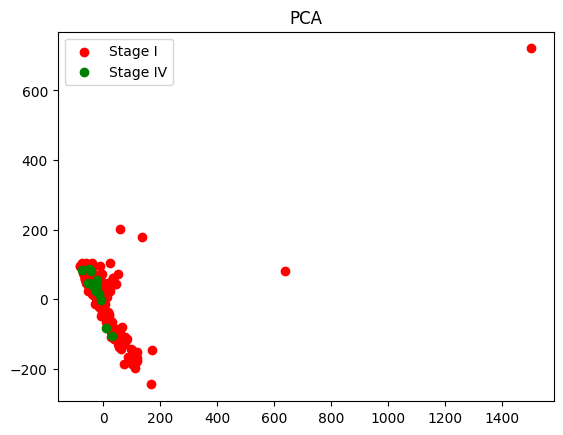

In [24]:
meta_values = amostras_filtradas["figo_stage"]
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

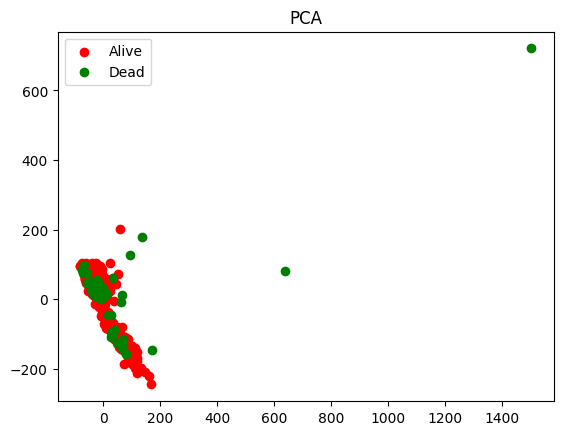

In [25]:
meta_values2 = amostras_filtradas["vital_status"]
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(X_r[meta_values2 == name, 0], X_r[meta_values2 == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA')
plt.show()

<p align="justify">
Como podemos ver através do primeiro e segundo gráficos, os dados são mostrados em função do "figo_stage" e em função do "vital_status" respetivamente, e, vemos que estes não conseguem ser explicados por nenhuma das condições de metadados, uma vez que não há uma divisão clara entre os grupos. No entanto, devemos ressalvar que os os PC1 e PC2 apenas explicam 25.69% da variabilidade dos nossos dados, logo, não é possível retirar uma conclusão segura destes gráficos.
</p>

#### t-SNE

In [26]:
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(data_scale)

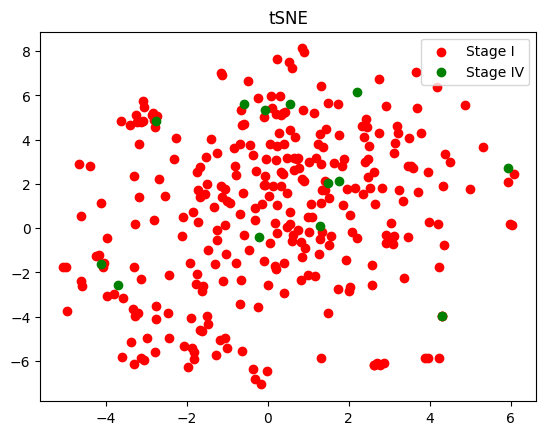

In [27]:
plt.figure()
for c, name in zip("rg", ["Stage I", "Stage IV"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

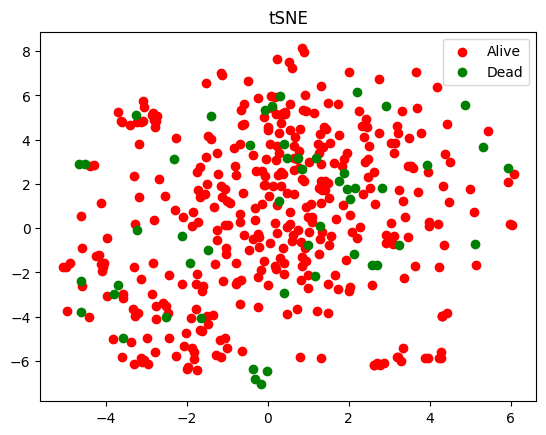

In [28]:
plt.figure()
for c, name in zip("rg", ["Alive", "Dead"]):
    plt.scatter(points[meta_values2 == name, 0], points[meta_values2 == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()

Da mesma maneira, através da técnica de t-SNE, não conseguimos explicar a variabilidade dos dados com base nas duas condições mencionadas acima.

### GSEA (Gene Set Enrichment Analysis)

A GSEA permite identificar se um grupo de genes específicos está significativamente enriquecido em genes que são diferencialmente expressos em duas condições biológicas diferentes. Isso ajuda a compreender quais processos biológicos ou vias estão ativas ou reguladas de forma diferente entre as condições em estudo. A biblioteca **gseapy** é uma implementação Python da GSEA que oferece uma interface conveniente e eficiente para realizar análises de enriquecimento.

Escolheu-se como conjunto de genes de background ["Hallmark](https://www.gseamsigdb.org/gsea/msigdb/human/collections.jsp#C2), guardado em "path", uma vez que estes conjuntos de genes  foram cuidadosamente selecionados e curados para refletir padrões de expressão gênica que são altamente consistentes e relevantes para processos biológicos conhecidos.

Esta análise de enriquecimento é feita sobre todos os genes identificados como diferencialmente expressos entre as duas condições, guardados em "res", sem qualquer tipo de filtragem. Realizar a análise de enriquecimento de conjuntos de genes nos genes diferencialmente expressos não filtrados permite uma exploração mais abrangente e imparcial dos processos biológicos que estão a ser regulados diferencialmente em cada condição.

Ao acedermos ao DataFrame podemos ver que já temos uma coluna "gene_name" que nos vai permitir fazer corresponder os nossos genes ao conjunto de genes escolhido como background.  De uma forma simples, a GSEA vai comparar os genes diferencialmente expressos ("res") com o conjunto de genes "Hallmark" para ver se algum desses conjuntos é enriquecido com os genes em "res".

In [174]:
res #todos os genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
row.names(geneExp_df),,,,,,,
ENSG00000000003.15,2514.763645,-0.122307,0.181285,-0.674664,0.499889,0.756581,TSPAN6
ENSG00000000005.6,3.148786,-0.221056,0.685811,-0.322328,0.747204,0.898197,TNMD
ENSG00000000419.13,690.182327,0.278573,0.176900,1.574750,0.115314,0.380492,DPM1
ENSG00000000457.14,422.132337,-0.611937,0.186702,-3.277608,0.001047,0.028049,SCYL3
ENSG00000000460.17,204.499079,-0.322030,0.227085,-1.418103,0.156161,0.441096,C1orf112
...,...,...,...,...,...,...,...
ENSG00000288658.1,20.880969,0.616013,0.410265,1.501501,0.133226,0.408308,AC010980.1
ENSG00000288660.1,1.094814,0.928499,0.794148,1.169177,0.242332,NaN,AC004233.4
ENSG00000288663.1,19.182492,-0.029071,0.270874,-0.107323,0.914532,0.968780,AC073611.1


O primeiro passo será preparar os dados para a análise GSEA. Para isso, os resultados da análise de expressão diferencial são ordenados pela alteração na expressão (log2FoldChange) em ordem decrescente e depois serão atribuidos à raviável ranks, que é essencialmente uma lista classificada dos genes com base na sua alteração na expressão. Os índices do ranking (que representam os nomes dos genes) são associados aos nomes dos genes correspondentes nos resultados ordenados. Isso permite uma identificação clara dos genes durante a análise GSEA.

Uma etapa importante na preparação dos dados é a remoção de duplicados, uma vez que a presença de genes duplicados nos rankings pode distorcer os resultados da análise GSEA, pois um mesmo gene duplicado pode ser contado múltiplas vezes, levando a uma sobre-representação indevida de certas vias biológicas ou processos celulares.

A análise de enriquecimento de conjuntos de genes é realizada (gp.prerank) usando os rankings preparados (rnk) e os conjuntos de genes de background especificados (gene_sets). O resultado é salvo em um diretório de saída especificado, com opções para definir parâmetros como tamanho mínimo e máximo de conjuntos de genes, número de permutações para calcular o p-valor, entre outros, sendo que foram utilizados valores padrão, encontrados em [tutoriais de GSEA](https://github.com/mousepixels/sanbomics_scripts/blob/main/PyDeseq2_DE_tutorial.ipynb).

In [179]:
# Carregamento do grupo de genes background para a análise de enriquecimento
path = 'h.all.v2023.2.Hs.symbols.gmt' 

# Ordena os resultados pela alteração no LFC em ordem decrescente
results_ord = res.sort_values(by="log2FoldChange", ascending=False)

# Prepara os rankings para a GSEA
ranks = results_ord["log2FoldChange"]

# Associa às linhas o nome do gene
ranks.index = results_ord["gene_name"]

# Identifica genes duplicados
duplicated_genes = ranks.index[ranks.index.duplicated()]

# Remove genes duplicados
ranks = ranks[~ranks.index.isin(duplicated_genes)]

# Executar a análise GSEA com os genes não duplicados
pre_res = gp.prerank(
    rnk=ranks,              # Lista ranqueada de genes
    gene_sets=path,         # Caminho para o arquivo GMT com os conjuntos de genes
    nperm=100,              # Número de permutações para calcular o p-valor  
    seed=6,
    verbose=True            # Exibir detalhes durante a execução
)

2024-05-31 17:53:21,595 [INFO] Parsing data files for GSEA.............................
2024-05-31 17:53:21,621 [INFO] 0000 gene_sets have been filtered out when max_size=500 and min_size=15
2024-05-31 17:53:21,626 [INFO] 0050 gene_sets used for further statistical testing.....
2024-05-31 17:53:21,627 [INFO] Start to run GSEA...Might take a while..................
2024-05-31 17:53:27,844 [INFO] Congratulations. GSEApy runs successfully................



A função **.res2d** é usada para aceder aos resultados bidimensionais de uma análise de enriquecimento, e através da identificação das colunas conseguimos ver que a variável pre_res contém informações sobre métricas importantes neste tipo de análise, nomeadamente os campos **'Term'**, **'ES'**, **'NES'** e **'FDR q-val'**, sendo que correspondem ao nome do conjunto de genes ou termo biológico associado aos genes enriquecidos, à Pontuação de Enriquecimento (Enrichment Score), à Pontuação de Enriquecimento Normalizada (Normalized Enrichment Score) e ao valor q do FDR que é uma correção de múltiplos testes aplicada aos valores de p-valor para controlar a taxa de falsas descobertas, respetivamente. Geralmente, FDR q-values menores que 0,05 são considerados estatisticamente significativos.

In [180]:
print(pre_res.res2d.columns)

Index(['Name', 'Term', 'ES', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val',
       'Tag %', 'Gene %', 'Lead_genes'],
      dtype='object')


Um passo importante para que consigamos analisar os resultados obtidos passa pela ordenação dos resultados.

Ordenar os resultados pelo FDR q-val em ordem crescente permite controlar a taxa de descobertas falsas. Conjuntos de genes com valores de FDR q-val menores são considerados mais significantes estatisticamente. Portanto, ao ordenar os resultados por FDR q-val em ordem crescente, os conjuntos de genes mais confiáveis em termos de significância estatística aparecem no topo da lista.

Por outro lado, ordenar os resultados pelo NES em ordem decrescente coloca os conjuntos de genes com maior enriquecimento no topo da lista.

Deste modo, esta ordenação permite identificar rapidamente os conjuntos de genes mais relevantes e estatisticamente significativos.

In [123]:
# Selecionar apenas as colunas desejadas do DataFrame
res_subset = pre_res.res2d[["Term", "FDR q-val", "ES", "NES"]]

# Ordenar os resultados por ordem decrescente de NES e, em seguida, por ordem crescente de FDR q-val
res_ordenado = res_subset.sort_values(by=["NES", "FDR q-val"], ascending=[False, True])

# Salvar o resultado da análise de enriquecimento ordenado
res_ordenado.to_csv("enrichment_analysis_python.csv", index=True)

In [127]:
res_ordenado

,Term,FDR q-val,ES,NES
0,HALLMARK_OXIDATIVE_PHOSPHORYLATION,0.002756,0.453976,1.987237
1,HALLMARK_ALLOGRAFT_REJECTION,0.002756,0.454273,1.948798
2,HALLMARK_INTERFERON_GAMMA_RESPONSE,0.002756,0.436072,1.889646
3,HALLMARK_MTORC1_SIGNALING,0.008957,0.40393,1.735314
4,HALLMARK_E2F_TARGETS,0.014882,0.38427,1.663735
5,HALLMARK_MYOGENESIS,0.018373,0.371914,1.621433
6,HALLMARK_PANCREAS_BETA_CELLS,0.022835,0.47891,1.577497
7,HALLMARK_DNA_REPAIR,0.032383,0.36437,1.521284
8,HALLMARK_COMPLEMENT,0.043177,0.342242,1.478571
9,HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.0576,0.382782,1.435252


Portanto, acedendo ao primeiro elemento do DataFrame ("res_ordenado.iloc[0].Term"), identificamos rapidamente o conjunto de genes mais significativamente enriquecido na análise, neste caso o conjunto **'HALLMARK_OXIDATIVE_PHOSPHORYLATION'**. Por outro lado, acedendo ao último elemento do DataFrame ("res_ordenado.iloc[0].Term"), identificamos rapidamente o conjunto de genes com um score de enriquecimento menor **HALLMARK_KRAS_SIGNALING_DN** , no entanto também é aquele em que o valor de FDR q-val é maior, portanto, não podemos dizer que é o conjunto de genes menos significativamente enriquecido na análise, daí ser importante realizar esta análise com as duas métricas em conjunto.

In [188]:
#primeiro
res_ordenado.iloc[0].Term

'HALLMARK_OXIDATIVE_PHOSPHORYLATION'

In [187]:
#último
res_ordenado.iloc[-1].Term

'HALLMARK_KRAS_SIGNALING_DN'

Utilizando o **gseaplot**, o gráfico a baixo permite-nos de forma mais visual caraterizar os conjuntos de genes com base nas métricas relacionadas com o enriquecimento.

[<Axes: xlabel='Gene Rank'>, <Axes: ylabel='Enrichment Score'>]

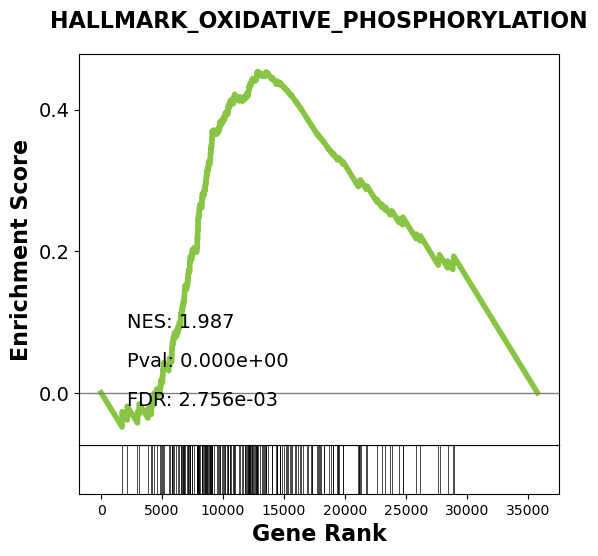

In [132]:
gseaplot(rnk=pre_res.ranking, term="HALLMARK_OXIDATIVE_PHOSPHORYLATION", **pre_res.results['HALLMARK_OXIDATIVE_PHOSPHORYLATION'])

O conjunto **HALLMARK_OXIDATIVE_PHOSPHORYLATION** refere-se a um conjunto de genes que codificam proteínas envolvidas no processo de fosforilação oxidativa, informação que pode ser acedida no site da [GSEA](https://www.gseamsigdb.org/gsea/msigdb/human/geneset/HALLMARK_OXIDATIVE_PHOSPHORYLATION.html).
Um estudo recente sobre os [efeitos da fosforilação oxidativa no mecanismo de resistência a drogas contra o cancro](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9817696/), revelou que as células cancerosas resistentes mostram ativação de uma variedade de vias oncogênicas que promovem a atividade da fosforilação oxidativa. Para além disso, revelou que inibidores da fosforilação oxidativa têm prevenido significativamente ou atrasado a resistência a medicamentos contra o cancro e sensibilizado células cancerosas resistentes à terapia padrão. Para além disso, esse mesmo estudo sugere que, em certos tipos de cancro, como linfomas e carcinoma endometrial, a fosforilação oxidatativa está "upregulated", e inibidores da mesma podem, portanto, exercer um efeito repressivo sobre esses tipos de cancro. 

Como podemos analisar, este conjunto de genes apresenta-se como o mais significativamente enriquecido na análise para a nossa condição em estudo "Stage IV" quando comparada a "Stage I". O facto deste conjunto de genes estar positivamente enriquecido sugere que esse processo metabólico desempenha um papel crucial na progressão e desenvolvimento da doença, o que, com base nos estudos existentes parece fazer sentido. 

#### Heatmap

O heatmap fornece uma representação visual das diferenças de expressão entre genes e/ou amostras. O método **sns.clustermap** recebe um DataFrame de contagens normalizadas e loragitmizadas, onde as linhas devem corresponder aos genes e as colunas às amsotras. Para a nossa análise utilizamos os genes filtrados, identificados como diferencialmente expressos. Ao comparar os padrões de expressão observados no heatmap com conhecimento biológico prévio ou com resultados de outras análises, seria interessante validar os resultados da expressão diferencial, no entanto, o heatmap dos nossos dados não nos permitiu tirar conclusões relativas às condições em estudo.

In [136]:
dds.layers["normed_counts"]

array([[1.68695366e+03, 0.00000000e+00, 6.60112302e+02, ...,
        2.37599107e+01, 7.33458114e+01, 4.75198215e+01],
       [1.94905528e+03, 2.04732697e+00, 6.21363735e+02, ...,
        2.04732697e+01, 6.96091170e+01, 4.50411933e+01],
       [3.97156579e+03, 9.84279007e+00, 7.14586559e+02, ...,
        2.85440912e+01, 1.87013011e+02, 6.98838095e+01],
       ...,
       [1.77553710e+03, 1.59098306e+00, 2.51375324e+02, ...,
        6.36393225e+00, 4.61385088e+01, 3.02286782e+01],
       [3.46583685e+03, 3.10976837e+00, 1.04540047e+03, ...,
        1.71037260e+01, 1.30610272e+02, 1.24390735e+01],
       [1.87873003e+03, 8.79555258e-01, 5.10142049e+02, ...,
        1.67115499e+01, 1.67115499e+02, 1.58319946e+01]])

In [137]:
dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])

In [141]:
#podemos utilizar os genes que quisermos no heatmap, aqui usamos apenas os diferencialmente expressos
dds_dif_exp = dds[:,diferencialmente_expressos.index]
dds_dif_exp

View of AnnData object with n_obs × n_vars = 423 × 1162
    obs: 'vital_status', 'primary_diagnosis', 'age_at_index', 'figo-stage'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [143]:
#para o heatmap: dds_dif_exp.var_names,dds_dif_exp.obs_names,log1p values e da matriz transposta

In [197]:
grapher= pd.DataFrame(dds_dif_exp.layers["log1p"].T, index=dds_dif_exp.var_names, columns=dds_dif_exp.obs_names)

In [198]:
grapher

row.names(amostras_metadados),TCGA-BG-A221-01A-21R-A157-07,TCGA-EY-A1GK-01A-11R-A13S-07,TCGA-AX-A1CE-01A-11R-A137-07,TCGA-D1-A1O8-01A-11R-A14D-07,TCGA-DI-A0WH-01A-12R-A12I-07,TCGA-BK-A4ZD-01A-11R-A27V-07,TCGA-EY-A215-01A-11R-A14M-07,TCGA-BG-A0M8-01A-12R-A104-07,TCGA-2E-A9G8-01A-11R-A40A-07,TCGA-D1-A102-01A-11R-A10J-07,...,TCGA-A5-A0GP-01A-11R-A040-07,TCGA-AP-A0LN-01A-11R-A040-07,TCGA-H5-A2HR-01A-11R-A180-07,TCGA-E6-A1LX-01A-11R-A14D-07,TCGA-BG-A0MT-01A-11R-A104-07,TCGA-EY-A549-01A-11R-A27V-07,TCGA-D1-A1O7-01A-11R-A14D-07,TCGA-BK-A0C9-01A-11R-A00V-07,TCGA-AJ-A5DW-01A-11R-A27V-07,TCGA-D1-A103-01A-11R-A10J-07
row.names(geneExp_df),,,,,,,,,,,,,,,,,,,,,
ENSG00000000457.14,5.533633,6.296221,5.600983,5.893841,6.138275,6.594693,5.509948,5.350001,5.487415,6.065274,...,5.660349,5.165146,5.354051,5.845473,6.217581,6.430245,5.359321,5.913795,5.945281,5.785534
ENSG00000002587.10,5.736181,4.993041,5.065658,5.268575,5.528775,5.872653,4.324880,5.458146,4.503995,6.551823,...,5.711656,7.592376,3.826440,5.306417,8.826108,7.222764,6.527639,7.007729,8.088540,6.506474
ENSG00000002726.21,5.439534,3.784050,6.149606,8.585437,3.728375,1.865021,4.509499,5.886336,7.375284,6.157319,...,8.520662,4.922129,7.046409,3.741333,6.707431,9.212777,8.298785,8.882306,3.004539,7.244493
ENSG00000002822.15,2.427489,1.811287,2.818307,3.063486,2.730037,1.185818,2.792380,3.408098,2.453183,1.528320,...,2.012381,2.220346,0.000000,1.815520,1.126672,1.609142,2.322305,0.000000,1.734246,1.836945
ENSG00000002933.9,7.457248,5.869760,5.430960,8.348268,7.749079,4.588024,4.703035,8.036530,5.085307,7.092050,...,7.128057,5.329152,6.819813,4.792515,6.549016,9.053251,4.970493,6.588222,5.867715,5.510503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000287778.1,3.122093,3.354766,3.352001,2.214935,3.911475,4.269338,3.239137,3.515833,2.983180,3.661238,...,3.712763,3.814119,2.503459,3.856477,5.462153,4.674537,4.554254,3.441337,4.162501,4.032682
ENSG00000287837.1,5.569714,5.950252,3.954747,3.474544,4.235321,6.098558,5.213938,5.968731,3.371624,5.466288,...,2.905969,5.869444,2.242679,8.120141,4.260705,6.042263,4.740193,5.518229,6.300219,5.958747
ENSG00000287852.1,1.120400,0.704909,0.000000,0.000000,0.000000,5.213731,0.703751,2.425565,3.208852,2.106674,...,3.601307,1.779402,1.888940,2.165207,5.936089,3.702312,2.216703,4.262726,4.507171,3.310056


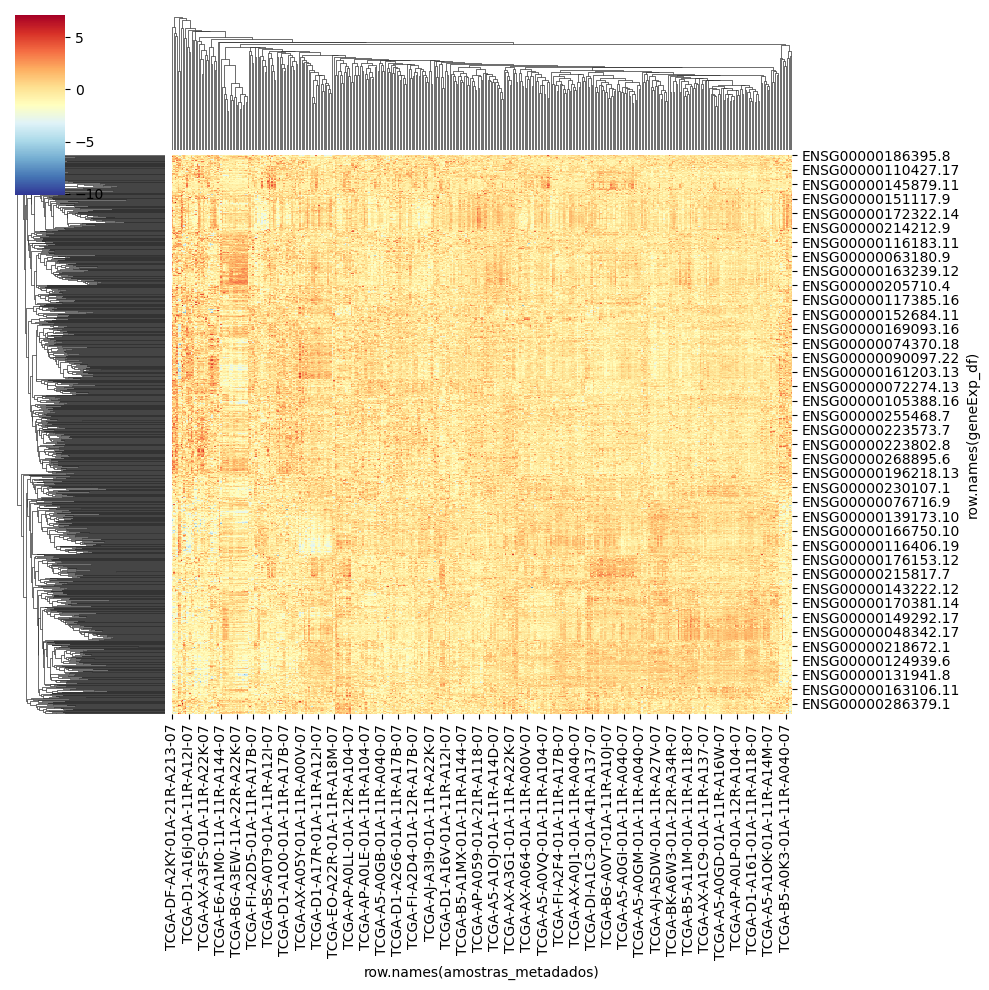

In [200]:
sns.clustermap(grapher, z_score=0, cmap="RdYlBu_r")

### Clustering

#### Hierárquico

<p align="justify">
Este tipo de clustering baseia-se na probabilidade de pertencer a um grupo e segue uma abordagem aglomerativa (recorrendo à estratégia bottom-up), começando pelas folhas até à raiz da árvore. A análise do cluster hierárquico usa a distânca Euclidiana para calcular a proximidade entre os pontos num espaço multidimensional, considerando todas as dimensões.
</p>

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot do dendograma
    dendrogram(linkage_matrix, **kwargs)

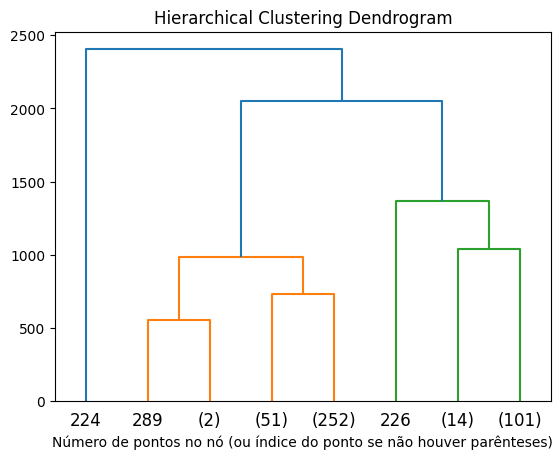

In [30]:
X = data_scale

# Inicialização do modelo de clustering hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Ajuste do modelo aos dados
model.fit(X)

# Plot do dendrograma
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Número de pontos no nó (ou índice do ponto se não houver parênteses)")
plt.show()

#### K-Means

<p align="justify">
Esta abordagem de clustering, agrupa os dados de forma a minimizar as distâncias entre os pontos e centróides dos clusters. Um método muito utilizado para auxiliar na determinação do número adequado de clusters é o “método do cotovelo”. Este método envolve a análise da variação da soma dos quadrados intra-cluster (WSS) em relação ao número de clusters.
</p>

[22003756.80508829, 21365735.762092568, 19039092.15394213, 18710487.02557339, 18922231.499951772, 16885544.654392127, 16881637.821824193, 16880296.88018752, 16305647.517548561]


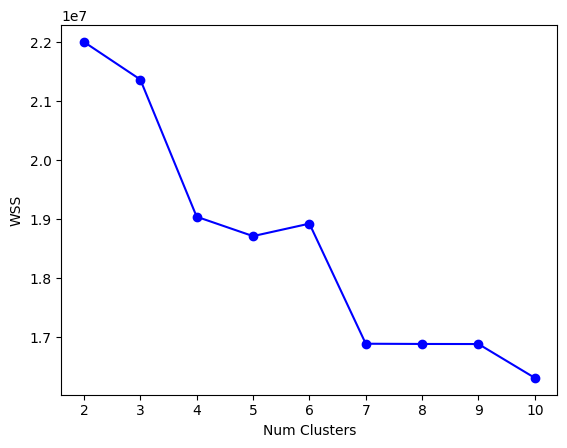

In [31]:
from sklearn.cluster import KMeans

ofs = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = "auto")
    kmeans.fit(data_scale)
    ofs.append(kmeans.inertia_)

print(ofs)
plt.plot(range(2, 11), ofs, 'b-o')
plt.xlabel('Num Clusters')
plt.ylabel('WSS')
plt.show()


In [ ]:
#k=3

<p align="justify">
Através da observação do gráfico verificou-se que o ponto no gráfico que se assemelha a um “cotovelo” é o ponto K=3. A partir do ponto k=3, a adição de mais clusters não resulta numa redução significativa da WSS.
Partindo desse princípio, decidiu-se aplicar o algoritmo do K-means, de modo a criar uma tabela que permitisse analisar a distribuição das amostras nos clusters em relação ao metadado estudado (figo_stage).
</p>

In [32]:
kmeans3 = KMeans(n_clusters=3, n_init = "auto")
res_kmeans = kmeans3.fit(data_scale).predict(array_data)

pd.crosstab(amostras_filtradas.loc[:,"figo_stage"], res_kmeans)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


col_0,0,1,2
figo_stage,,,
Stage I,49,227,23
Stage II,11,20,4
Stage III,15,54,7
Stage IV,2,11,0


<p align="justify">
Observando a tabela, verificou-se que existem clusters que têm uma separação diferenciada dos dados no que toca ao metadado analisado (figo_stage), cumprindo o principal propósito do k-means.No entanto, existem clusters cuja separação dos dados não é a clara.
</p>

# Machine Learning

<p align="justify">
A análise supervisionada é uma abordagem de machine learning na qual os modelos são treinados com um conjunto de dados de entrada, juntamente com os rótulos associados a esses dados. Durante o treino, o modelo aprende a relação entre os dados de entrada e a sua classificação através de ajustes iterativos de modo a minimizar o erro entre as previsões e as classificações dos dados de treino. Após o treino, os modelos são utilizados para realizar a previsão da classificação de um novo conjunto de dados em que não se sabe a sua classificação.
</p>

<p align="justify">
Para dados de expressão, os modelos de machine learning podem ser utilizados para vários fins. Estes modelos são, por exemplo, utilizados para realizar a previsão de fenótipos com base no perfil de expressão genética sendo úteis para prever a resposta de um paciente a um determinado tratamento ou para prever a gravidade da doença e como esta poderá progredir com o tempo.
</p>

<p align="justify">
A primeira fase de machine learning consite na preparação dos dados de expressão genética para posteriomente serem utilizados para o treino do modelo e consequente teste do modelo.
</p>

In [46]:
# Copy the original dataframe
amostras_filtradas 

,vital_status,primary_diagnosis,age_at_index,figo_stage
row.names(amostras_metadados),,,,
TCGA-BG-A221-01A-21R-A157-07,Alive,"Endometrioid adenocarcinoma, NOS",84.0,Stage I
TCGA-EY-A1GK-01A-11R-A13S-07,Alive,"Endometrioid adenocarcinoma, NOS",74.0,Stage I
TCGA-AX-A1CE-01A-11R-A137-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
TCGA-D1-A1O8-01A-11R-A14D-07,Dead,"Endometrioid adenocarcinoma, NOS",70.0,Stage III
TCGA-DI-A0WH-01A-12R-A12I-07,Alive,"Endometrioid adenocarcinoma, NOS",64.0,Stage I
...,...,...,...,...
TCGA-EY-A549-01A-11R-A27V-07,Alive,"Endometrioid adenocarcinoma, NOS",78.0,Stage I
TCGA-D1-A1O7-01A-11R-A14D-07,Alive,"Endometrioid adenocarcinoma, NOS",60.0,Stage I
TCGA-BK-A0C9-01A-11R-A00V-07,Alive,"Endometrioid adenocarcinoma, NOS",57.0,Stage I


In [47]:
# X, i.e. the features or attributes
characters=amostras_filtradas.to_numpy()
# y, i.e. the class attribute where 0=Dead and 1=Alive
type_label=amostras_filtradas['vital_status'].to_numpy()
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

# Normalização

<p align="justify">
A normalização é uma fase crucial ligada ao pré-processamento de dados para modelos de aprendizagem de máquina. Esta prática é fundamental para evitar questões relacionadas com a escala dos valores presentes no conjunto de dados. No contexto deste relatório, optou-se por uma técnica de normalização que ajusta os dados para que estes variem somente entre 0 e 1, definindo-se 0 como o valor mínimo, e 1 como o valor máximo.
</p>

In [48]:
min_max_escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Divisão do Dataset

<p align="justify">
Após a filtragem dos genes diferencilamente expressos, procedeu-se à criação do dataset de treino e de teste sendo que se utilizou 70% dos dados para a criação do dataset de treino e cerca de 30% para o dataset de teste.
</p>

In [51]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.3, random_state=42, shuffle=True)

In [52]:
sss = StratifiedKFold(n_splits =10, random_state=42, shuffle=True) 

<p align="justify">
</p>
Na seguinte etapa do trabalho realizaram-se previsões, tendo por base os dados existentes, opor outras palavras, previu-se a classificação  de uma nova amostra.
Para tal, foram treinados e testados dois modelos: Random Forest e k-Nearest Neighbors.
</p>

<p align="justify">
Para cada modelo, exploraram-se diversos hiperparâmetros. Recorreu-se a uma técnica de otimização de hiperparâmetros bastante utilizada em ML que se denomina Gridsearch. Nesta técnica, um conjunto de hiperparâmetros é especificado e todas as combinações possíveis desses hiperparâmetros são avaliadas usando validação cruzada. O objetivo foi encontrar a combinação de hiperparâmetros que resulte no melhor desempenho do modelo, sendo que se optou pela métrica do f1-score como referência.
</p>

<p align="justify">
Neste trabalho, teve-se sempre em consideração um processo de validação cruzada de 10 vezes, do conjunto de dados de treino, em que uma parte do conjunto de dados, denominada de conjunto de validação, foi usada para teste e as outras nove foram usadas para treino. Este processo foi iterado mais de dez vezes, usando, por sua vez, cada uma das dez partes como conjunto de validação. Como se verificou anteriormente, a distribuição dos dados por classe é de aproximadamente 55% 45%  para a classe 1 e 0 , respetivamente. Assim sendo, usou-se amostragem estratificada para garantir que há uma percentagem semelhante à existente do dataset original da classe positiva (y=1) e negativa (y=0), quer no dataset treino, como no test. 
</p>

<p align="justify">
Para conhecer a avaliação dos modelos, teve-se por base as confusion matrix obtidas, mais concretamente os valores dos TP, TN, FP e FN. Estes valores são a base das diferentes métricas avaliadas como a precision, accuracy, recall, entre outros.
</p>

<p align="justify">
Em suma, a pipeline realizada daqui em diante para cada um dos modelos de ML e DL mencionados será a seguinte:

1) Otimização dos hiperparâmetros por gridsearch (10 x cross-validation);

2) Treinar o modelo com o melhor conjunto de hiperparâmetros (70 % dataset-treino);

3) Testar o modelo treinado com o dataset test(30% dataset-test);

4) Avaliar as métricas obtidas.
</p>

# k-Nearest Neighbors

<p align="justify">
O algoritmo k-Nearest Neighbors (k-NN), é um algoritmo versátil usado tanto para classificação, quanto para regressão em aprendizagem de máquina. Este método opera sob a premissa de que pontos de dados com características semelhantes tendem a agrupar-se em espaços próximos. O parâmetro "k" no k-NN indica o número de vizinhos mais próximos a serem considerados na hora de predizer a classe de um ponto de dados novo.
</p>

<p align="justify">
Na modalidade de classificação, o k-NN identifica as k instâncias mais próximas do ponto novo, baseando-se numa medida de distância como a Euclidiana, e atribui-lhe a classe que mais aparece entre esses vizinhos. Por exemplo, se k for definido como 5, a classe mais comum entre os cinco vizinhos mais próximos determina a classe do ponto em questão.
</p>

<p align="justify">
Além da sua aplicação em classificação, o k-NN também pode ser empregado para regressão. Nesse caso, ao invés de escolher a classe mais frequente, o algoritmo calcula a média ou a mediana (dependendo da implementação) dos valores dos k vizinhos mais próximos para estimar um valor contínuo.
</p>

<p align="justify">
Um aspecto crucial para o bom desempenho do k-NN é a escolha do número k, que pode variar bastante dependendo do conjunto de dados. Um valor muito pequeno de k pode tornar o modelo sensível a ruídos, enquanto um valor muito grande pode incluir pontos que são, na verdade, distantes e menos similares, degradando a precisão do modelo. A escolha de uma métrica de distância adequada também é fundamental para garantir que as distâncias calculadas refletem as verdadeiras semelhanças entre as instâncias.
</p>

### Explorar os hiperparâmetros e determinar a melhor combinação

In [ ]:
# Definir os hiperparâmetros
parameters = {
    'n_neighbors': [2,3, 5, 7,10,20,100],
    'weights': ['uniform', 'distance'],

}

# Criar o modelo k-NN
knn = KNeighborsClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv=5)

# Executar a busca em grid para encontrar os melhores hiperparâmetros
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores hiperparâmetros encontrados
best_params_KNN = grid_search.best_params_
best_params_KNN

### Treino do modelo k-NN com hiperparâmetros já definidos

In [ ]:
KN_classifier = KNeighborsClassifier(n_neighbors=20,weights="distance")

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_KN_train, X_KN_test, y_KN_train, y_KN_test =  X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_KN_train_new = X_KN_train
    X_KN_train_new = min_max_escala.fit_transform(X_KN_train_new)
    
    X_KN_test_new = X_KN_test
    X_KN_test_new = min_max_escala.transform(X_KN_test_new)
    
    KN_classifier.fit(X_KN_train_new, y_KN_train)
    y_pred = KN_classifier.predict(X_KN_test_new)

### Avaliação do treino do modelo k-NN

In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_escala.fit_transform(X_new)
KN_classifier.fit(X_new, y_tr)
y_tr_predict = KN_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

### Teste do modelo k-NN já treinado e respetivas métricas

In [ ]:
X_te_new = X_te[:,3:]

X_te_new = min_max_escala.transform(X_te_new)

y_KN_pred = KN_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_KN_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_KN_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_KN_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

### Confusion Matrix resultante do teste do modelo k-NN

In [ ]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_KN_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest 

<p align="justify">
Random Forest (RF), é um método de aprendizagem de máquina que opera através da combinação de múltiplas árvores de decisão para melhorar a robustez e a precisão das previsões. Adequado para tanto classificação quanto regressão, este modelo constrói diversas árvores de decisão durante o treinamento e faz as previsões com base na média dos resultados das árvores para regressão ou na maioria dos votos para classificação.
</p>

<p align="justify">
Embora seja altamente eficaz para uma grande variedade de dados, o Random Forest pode enfrentar desafios quando aplicado a conjuntos de dados desbalanceados. Nestas situações, as classes minoritárias podem não ser representadas adequadamente, levando a um modelo tendencioso que favorece as classes maioritárias.
</p>

<p align="justify">
Para mitigar esse problema, as técnicas como ajuste de pesos de classe, oversampling da classe minoritária ou undersampling da classe maioritária podem ser empregadas para equilibrar o dataset antes do treinamento. Adicionalmente, o Random Forest permite ajustes nos seus parâmetros, como o número de árvores (n_estimators) e a profundidade máxima das árvores (max_depth), o que pode ser crucial para evitar overfitting e melhorar o desempenho do modelo em dados complexos.
</p>

### Explorar os hiperparâmetros e determinar a melhor combinação

In [ ]:
# Definir os parâmetros a ajustar
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador RandomForest
RF_classifier = RandomForestClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

# Executar o grid search usando os dados de treino (X_tr e y_tr)
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores parâmetros
best_params_RF = grid_search.best_params_
best_params_RF

 ### Treino do modelo RF com hiperparâmetros já definidos

In [ ]:
#treino
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=1000)

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_escala.fit_transform(X_RF_train_new)
    
    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_escala.transform(X_RF_test_new)
    
    RF_classifier.fit(X_RF_train_new, y_RF_train)
    y_pred = RF_classifier.predict(X_RF_test_new)

### Avaliação do treino do modelo RF

In [ ]:
X_new = X_tr[:,3:]
X_new = min_max_escala.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

### Teste do modelo RF já treinado e respetivas métricas

In [ ]:
X_te_new = X_te[:,3:]
x_test_df = pd.DataFrame(X_te_new)
X_te_new = min_max_escala.transform(X_te_new)
x_test_df = pd.DataFrame(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

### Confusion Matrix resultante do teste do modelo RF

In [ ]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_RF_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Interpretação global dos modelos

<p align="justify">
Com o objetivo de facilitar a visualização do melhor modelo, decidiu-se colocar todas as métricas avaliadas num dataframe. Além disso ordenou-se pelos valores apresentados, em primeiro lugar, na accuracy e, caso existisse um empate, o segundo critério seria o valor da precisão.
</p>

In [ ]:
# Abrir o arquivo CSV e ler os dados em um DataFrame
df_metricas = pd.read_csv('metricas.csv',sep=';',keep_default_na=False)
# Organizar o DataFrame com base nos valores da coluna 'accuracy' em ordem decrescente
df_metricas = df_metricas.sort_values(by=['Accuracy','Precision'], ascending=False)


# Imprimir o DataFrame organizado
df_metricas

#melhor modelo é RF

<p align="justify">
Observando o dataframe, pode-se concluir que das duas abordagens efectuadas, o modelo de Machine Learning que apresenta maiores valores nas métricas analisadas é o xxxxxx. Assim, decidiu-se utilizar esse modelo como referência. 
</p>

# Escolha das features mais importantes para o melhor modelo selecionado (XXXX)

# Conclusão
<p align="justify">
</p>

# Bibliografia

<p align="justify">
[1] Sung H, Ferlay J, Siegel RL, Laversanne M, Soerjomataram I, Jemal A, Bray F. Global Cancer Statistics 2020: GLOBOCAN Estimates of Incidence and Mortality Worldwide for 36 Cancers in 185 Countries. CA Cancer J Clin.
    doi: 10.3322/caac.21660.

[2] Creasman WT, Odicino F, Maisonneuve P, Quinn MA, Beller U, Benedet JL, Heintz A, Ngan H, Pecorelli S. Carcinoma of the Corpus Uteri. Int J Gynaecol Obstet.
    doi: 10.1016/S0020-7292(06)60031-3.

[3] Leslie KK, Thiel KW, Goodheart MJ, De Geest K, Jia Y, Yang S. Endometrial cancer. Obstet Gynecol Clin North Am.
    doi: 10.1016/j.ogc.2012.04.001.

[4] Bhatla, N., Berek, J.S., Cuello Fredes, M., Denny, L.A., Grenman, S., Karunaratne, K., Kehoe, S.T., Konishi, I., Olawaiye, A.B., Prat, J. and Sankaranarayanan, R. Revised FIGO staging for carcinoma of the cervix uteri†.
    doi: 10.1002/ijgo.12749.

[5] Hong JY, An JY, Lee J, Park SH, Park JO, Park YS, Lim HY, Kim KM, Kang WK, Kim ST. Claudin 18.2 expression in various tumor types and its role as a potential target in advanced gastric cancer. Transl Cancer Res. 2020. 
    doi: 10.21037/tcr-19-1876.

[6] Bianco B, Barbosa CP, Trevisan CM, Laganà AS, Montagna E. Endometrial cancer: a genetic point of view. Transl Cancer Res. 2020. 
    doi: 10.21037/tcr-20-2334.
</p>

[7] Mark. (2024, May 29). mousepixels/sanbomics_scripts. GitHub. https://github.com/mousepixels/sanbomics_scripts/tree/main

[8] INSM1 INSM transcriptional repressor 1 [Homo sapiens (human)] - Gene - NCBI. (n.d.). Www.ncbi.nlm.nih.gov

[9] Kuji S, Endo A, Kubota M, Uekawa A, Kawakami F, Mikami Y, Koike J, Suzuki N. Immunosensitivity and specificity of insulinoma-associated protein 1 (INSM1) for neuroendocrine neoplasms of the uterine cervix. J Gynecol Oncol. 2023;34(1). https://doi.org/10.3802/jgo.2023.34.e1

[10] Kuji S, Watanabe R, Sato Y, Iwata T, Hirashima Y, Takekuma M, Ito I, Abe M, Nagashio R, Omae K, Aoki D, Kameya T. A new marker, insulinoma-associated protein 1 (INSM1), for high-grade neuroendocrine carcinoma of the uterine cervix: Analysis of 37 cases. Gynecol Oncol. 2017;144(2):384–390. https://doi.org/10.1016/j.ygyno.2016.11.020

[11] SPRR3 small proline rich protein 3 [Homo sapiens (human)] - Gene - NCBI. (n.d.). Www.ncbi.nlm.nih.gov

[12] Expression of SPRR3 in cancer - Summary - The Human Protein Atlas. (n.d.). Www.proteinatlas.org

[13] Cervical Cancer Analysis Reveals New Mutations. Cancer Discovery. 2017;7(4):344.1-344. https://doi.org/10.1158/2159-8290.cd-nb2017-020

[14] Yu L, Yang Z, Liu Y, et al. Identification of SPRR3 as a novel diagnostic/prognostic biomarker for oral squamous cell carcinoma via RNA sequencing and bioinformatic analyses. PeerJ. 2020;8
. https://doi.org/10.7717/peerj.9393

[15] HALLMARK_OXIDATIVE_PHOSPHORYLATION. (n.d.). Www.gsea-Msigdb.org

[16] Zhao Z, Mei Y, Wang Z, He W. The Effect of Oxidative Phosphorylation on Cancer Drug Resistance. Cancers. 2023;15(1):62. https://doi.org/10.3390/cancers15010062